https://www.dpie.nsw.gov.au/air-quality/search-for-and-download-air-quality-data
https://data.sa.gov.au/data/dataset/adelaide-cbd-air-quality-monitoring-station-particle
https://apps.des.qld.gov.au/air-quality/download/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
v1DF = pd.read_csv('fire_nrt_V1_96617.csv')
v1aDF = pd.read_csv('fire_archive_V1_96617.csv')

In [4]:
v1DF.tail()

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
956252 -32.66628  122.15253       306.9  0.39   0.44  2020-01-11      1630   
956253 -32.58616  123.39582       299.0  0.51   0.41  2020-01-11      1630   
956254 -33.37853  115.94735       309.7  0.40   0.60  2020-01-11      1630   
956255 -33.21827  115.75078       300.2  0.49   0.65  2020-01-11      1806   
956256 -33.22012  115.75043       300.3  0.49   0.65  2020-01-11      1806   

       satellite instrument confidence version  bright_ti5  frp daynight  
956252         N      VIIRS          n  1.0NRT       288.6  0.8        N  
956253         N      VIIRS          n  1.0NRT       287.4  0.7        N  
956254         N      VIIRS          n  1.0NRT       291.7  1.0        N  
956255         N      VIIRS          n  1.0NRT       290.2  1.1        N  
956256         N      VIIRS          n  1.0NRT       290.0  0.6        N

In [5]:
v1aDF.tail()

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
184773 -32.37209  116.10032       296.1  0.48   0.40  2019-09-30      1702   
184774 -32.38958  116.11151       296.1  0.48   0.40  2019-09-30      1702   
184775 -33.12481  116.03968       299.9  0.47   0.40  2019-09-30      1702   
184776 -33.63480  122.92641       296.2  0.43   0.38  2019-09-30      1702   
184777 -33.63897  122.93050       297.3  0.44   0.38  2019-09-30      1702   

       satellite instrument confidence  version  bright_ti5  frp  type  
184773         N      VIIRS          n        1       284.8  1.2     0  
184774         N      VIIRS          n        1       284.7  1.1     0  
184775         N      VIIRS          n        1       285.0  1.3     0  
184776         N      VIIRS          n        1       285.9  0.5     0  
184777         N      VIIRS          n        1       285.9  0.6     0

A number of things to be confirmed:
1. in v1aDF, drop 'type'?
2. in v1DF, drop daynight?
3. engineer the data for daynight?
4. which columns are generally not useful and can be dropped?

0    180150
3      2735
2      1893
Name: type, dtype: int64

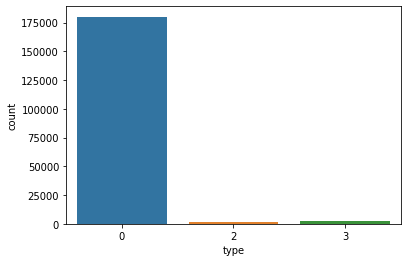

In [11]:
sns.countplot(x='type', data = v1aDF)
v1aDF['type'].value_counts()

In [113]:
v1aDF = v1aDF[v1aDF['type'] == 0]

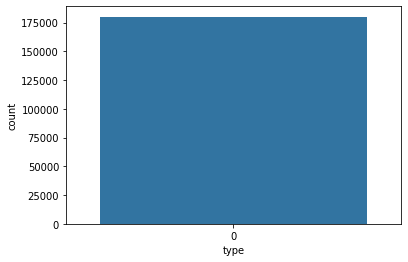

In [114]:
sns.countplot(x='type', data = v1aDF)

In [115]:
v1aDF.drop('type', axis = 1, inplace=True)

In [116]:
v1aDF.head()

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
1 -31.70724  151.07191       367.0  0.56   0.69  2019-08-01       247   
2 -31.39626  149.65253       325.2  0.68   0.74  2019-08-01       247   
3 -30.39774  152.06432       347.8  0.48   0.65  2019-08-01       247   
4 -31.20248  151.89766       350.7  0.50   0.66  2019-08-01       247   
5 -31.20390  151.89574       353.3  0.50   0.66  2019-08-01       247   

  satellite instrument confidence  version  bright_ti5   frp  
1         N      VIIRS          h        1       291.9  10.4  
2         N      VIIRS          n        1       292.7   5.6  
3         N      VIIRS          n        1       287.6   9.1  
4         N      VIIRS          n        1       292.3   9.4  
5         N      VIIRS          n        1       290.9  12.7

In [18]:
v1DF.groupby('daynight').mean()
v1DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956257 entries, 0 to 956256
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    956257 non-null  float64
 1   longitude   956257 non-null  float64
 2   bright_ti4  956257 non-null  float64
 3   scan        956257 non-null  float64
 4   track       956257 non-null  float64
 5   acq_date    956257 non-null  object 
 6   acq_time    956257 non-null  int64  
 7   satellite   956257 non-null  object 
 8   instrument  956257 non-null  object 
 9   confidence  956257 non-null  object 
 10  version     956257 non-null  object 
 11  bright_ti5  956257 non-null  float64
 12  frp         956257 non-null  float64
 13  daynight    956257 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 102.1+ MB


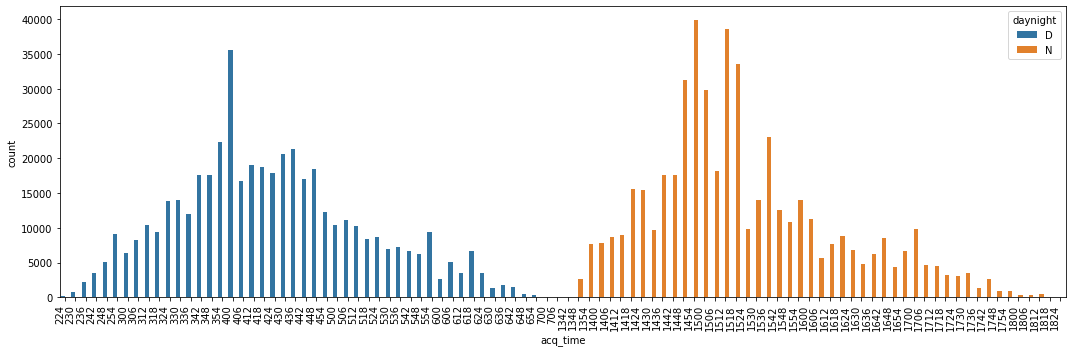

In [35]:
# since we cannot drop the column, we would engineer the daynight data for v1aDF.
# first, observe that in v1DF, day and night is reflected by acq_time feature
plt.figure(figsize=(15, 5))
ax = sns.countplot(x ='acq_time', hue = 'daynight', data = v1DF)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [45]:
print(v1DF[v1DF['daynight'] == 'D']['acq_time'].value_counts().sort_index().head(2))
print(v1DF[v1DF['daynight'] == 'D']['acq_time'].value_counts().sort_index().tail(2))
print(v1DF[v1DF['daynight'] == 'N']['acq_time'].value_counts().sort_index().head(2))
print(v1DF[v1DF['daynight'] == 'N']['acq_time'].value_counts().sort_index().tail(2))

224    186
230    706
Name: acq_time, dtype: int64
700    46
706    45
Name: acq_time, dtype: int64
1342      19
1348    2704
Name: acq_time, dtype: int64
1818    32
1824     4
Name: acq_time, dtype: int64


In [37]:
v1DF[v1DF['daynight'] == 'D']['acq_time'].value_counts().sort_index().tail(2)

700    46
706    45
Name: acq_time, dtype: int64

In [38]:
v1DF[v1DF['daynight'] == 'N']['acq_time'].value_counts().sort_index().head(2)

1342      19
1348    2704
Name: acq_time, dtype: int64

In [39]:
v1DF[v1DF['daynight'] == 'N']['acq_time'].value_counts().sort_index().tail(2)

1818    32
1824     4
Name: acq_time, dtype: int64

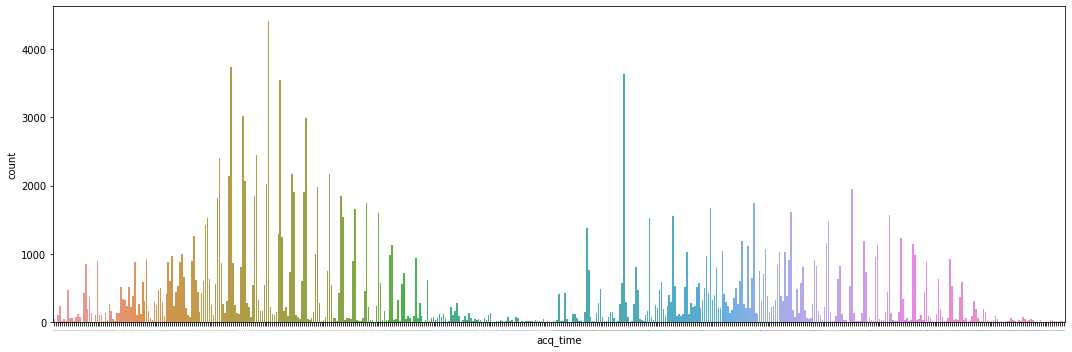

In [48]:
# now we know that day = 2:24 - 7:06, night = 13:42 - 18:24.
plt.figure(figsize = (15, 5))
ax = sns.countplot(x ='acq_time', data = v1aDF)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=1)
plt.tight_layout()
plt.show()

In [124]:
v1aDF['acq_time'].value_counts().sort_index()

229      35
230       1
234      97
235     235
236      15
       ... 
1817     10
1818     12
1821      2
1824      7
1827      3
Name: acq_time, Length: 510, dtype: int64

In [49]:
print(v1aDF[(v1aDF['acq_time'] > 710) & (v1aDF['acq_time'] < 1350)]['acq_time'].value_counts())
print(v1aDF[(v1aDF['acq_time'] > 1820)]['acq_time'].value_counts())

1347    11
1349     2
Name: acq_time, dtype: int64
1821    8
1824    7
1827    5
Name: acq_time, dtype: int64


In [126]:
v1aDF[(v1aDF['acq_time'] > 1820)]['acq_time'].value_counts()

1824    7
1827    3
1821    2
Name: acq_time, dtype: int64

So we know that, for data in v1aDF, if acq_time is between 1345 and 1830, then we can treat it as night.

In [51]:
v1aDF['daynight'] = v1aDF['acq_time'].apply(lambda x: 'N' if ((x >= 1345) and (x <= 1830)) else 'D')

D    106452
N     78326
Name: daynight, dtype: int64

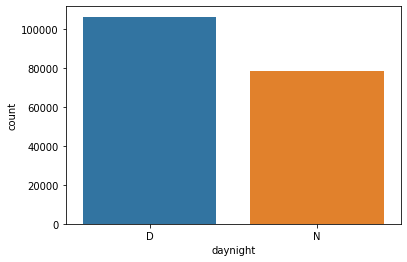

In [53]:
sns.countplot('daynight', data = v1aDF)
v1aDF['daynight'].value_counts()

In [55]:
# Now we concateate the two dfs together.
print(v1DF.shape, v1aDF.shape)

(1141035, 15) (184778, 15)


In [54]:
v1DF.shape, v1aDF.shape
v1DF = pd.concat([v1DF, v1aDF])
v1DF.shape

(1141035, 15)

In [142]:
v1DF.head()

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0 -42.69706  147.70634       333.6  0.57   0.43  2019-10-01       336   
1 -42.26889  147.31104       336.2  0.39   0.44  2019-10-01       336   
2 -40.85202  145.38068       327.9  0.46   0.47  2019-10-01       336   
3 -42.39329  147.47144       346.9  0.38   0.43  2019-10-01       336   
4 -42.69701  147.70584       334.1  0.56   0.43  2019-10-01       336   

  satellite instrument confidence version  bright_ti5  frp daynight  
0         N      VIIRS          n  1.0NRT       293.4  4.0        D  
1         N      VIIRS          n  1.0NRT       296.9  3.9        D  
2         N      VIIRS          n  1.0NRT       295.3  3.7        D  
3         N      VIIRS          n  1.0NRT       294.2  6.2        D  
4         N      VIIRS          n  1.0NRT       293.5  4.1        D

In [149]:
v1DF['satellite'].value_counts()

N    1136407
Name: satellite, dtype: int64

In [150]:
v1DF['instrument'].value_counts()

VIIRS    1136407
Name: instrument, dtype: int64

In [56]:
print(v1DF['satellite'].value_counts())
print(v1DF['instrument'].value_counts())
print(v1DF['version'].value_counts())

N    1141035
Name: satellite, dtype: int64
VIIRS    1141035
Name: instrument, dtype: int64
1.0NRT    956257
1         184778
Name: version, dtype: int64


In [57]:
v1DF.drop(['satellite', 'instrument', 'version', 'acq_time'], axis = 1, inplace=True)

In [156]:
v1DF.drop(['acq_time'], axis = 1, inplace = True)

In [159]:
cols = ['latitude','longitude','bright_ti4','bright_ti5','frp','daynight',
        'scan','track','acq_date','confidence']
v1DF = v1DF[cols]

In [160]:
v1DF.head()

latitude  longitude  bright_ti4  bright_ti5  frp daynight  scan  track  \
0 -42.69706  147.70634       333.6       293.4  4.0        D  0.57   0.43   
1 -42.26889  147.31104       336.2       296.9  3.9        D  0.39   0.44   
2 -40.85202  145.38068       327.9       295.3  3.7        D  0.46   0.47   
3 -42.39329  147.47144       346.9       294.2  6.2        D  0.38   0.43   
4 -42.69701  147.70584       334.1       293.5  4.1        D  0.56   0.43   

     acq_date confidence  
0  2019-10-01          n  
1  2019-10-01          n  
2  2019-10-01          n  
3  2019-10-01          n  
4  2019-10-01          n

In [164]:
v1DF['acq_date'].value_counts().sort_index()

2019-08-01    3671
2019-08-02    2918
2019-08-03    2377
2019-08-04    2278
2019-08-05    1901
              ... 
2020-01-07    9456
2020-01-08    3171
2020-01-09    4452
2020-01-10    2925
2020-01-11    5631
Name: acq_date, Length: 164, dtype: int64

In [170]:
v1DF['acq_date'] = pd.to_datetime(v1DF['acq_date'])

In [171]:
v1DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1136407 entries, 0 to 184777
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   latitude    1136407 non-null  float64       
 1   longitude   1136407 non-null  float64       
 2   bright_ti4  1136407 non-null  float64       
 3   bright_ti5  1136407 non-null  float64       
 4   frp         1136407 non-null  float64       
 5   daynight    1136407 non-null  object        
 6   scan        1136407 non-null  float64       
 7   track       1136407 non-null  float64       
 8   acq_date    1136407 non-null  datetime64[ns]
 9   confidence  1136407 non-null  object        
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 135.4+ MB


In [176]:
v1DF['acq_date'].sort_values()

3178     2019-08-01
2474     2019-08-01
2475     2019-08-01
2476     2019-08-01
2477     2019-08-01
            ...    
952499   2020-01-11
952498   2020-01-11
952497   2020-01-11
953442   2020-01-11
950867   2020-01-11
Name: acq_date, Length: 1136407, dtype: datetime64[ns]

## now read in the sydney air quality input

In [58]:
sydney = pd.read_excel('sydney.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [59]:
sydney

Daily Averages Time Range: 01/08/2019 00:00 to 01/02/2020 00:00  \
0                                         Initial Data                
1                                                 Date                
2                                           01/08/2019                
3                                           02/08/2019                
4                                           03/08/2019                
..                                                 ...                
181                                         27/01/2020                
182                                         28/01/2020                
183                                         29/01/2020                
184                                         30/01/2020                
185                                         31/01/2020                

                          Unnamed: 1                      Unnamed: 2  \
0            RANDWICK SO2 1h average          ROZELLE SO2 1h average   
1    RANDWICK SO2 24h average [pphm]  ROZELLE SO2 24h average [pphm]   
2                                0.1                             0.1   
3                                0.1                             0.3   
4                                0.1                             0.1   
..                               ...                             ...   
181                                0                               0   
182                              0.1                             0.2   
183                                0                               0   
184                              0.1                               0   
185                                0                             0.1   

                           Unnamed: 3                        Unnamed: 4  \
0            LINDFIELD SO2 1h average          LIVERPOOL SO2 1h average   
1    LINDFIELD SO2 24h average [pphm]  LIVERPOOL SO2 24h average [pphm]   
2                                 NaN                               0.1   
3                                 NaN                               0.1   
4                                 NaN                               0.1   
..                                ...                               ...   
181                               NaN                               NaN   
182                               NaN                               NaN   
183                               NaN                                 0   
184                               NaN                               0.1   
185                               NaN                               0.3   

                           Unnamed: 5                       Unnamed: 6  \
0            BRINGELLY SO2 1h average          CHULLORA SO2 1h average   
1    BRINGELLY SO2 24h average [pphm]  CHULLORA SO2 24h average [pphm]   
2                                   0                              0.1   
3                                   0                                0   
4                                 0.1                              0.1   
..                                ...                              ...   
181                                 0                              0.1   
182                               0.1                              0.2   
183                                 0                                0   
184                                 0                                0   
185                               0.2                              0.3   

                          Unnamed: 7                    Unnamed: 8  \
0            RICHMOND SO2 1h average          BARGO SO2 1h average   
1    RICHMOND SO2 24h average [pphm]  BARGO SO2 24h average [pphm]   
2                                NaN                             0   
3                                  0                             0   
4                                  0                             0   
..                               ...                           ...   
181   

In [60]:
col = sydney.iloc[1].to_list()
sydney.columns = col
sydney.drop([0, 1],inplace=True)

In [61]:
sydney.head()

Date RANDWICK SO2 24h average [pphm] ROZELLE SO2 24h average [pphm]  \
2  01/08/2019                             0.1                            0.1   
3  02/08/2019                             0.1                            0.3   
4  03/08/2019                             0.1                            0.1   
5  04/08/2019                               0                              0   
6  05/08/2019                             0.2                            0.2   

  LINDFIELD SO2 24h average [pphm] LIVERPOOL SO2 24h average [pphm]  \
2                              NaN                              0.1   
3                              NaN                              0.1   
4                              NaN                              0.1   
5                              NaN                                0   
6                              NaN                              0.2   

  BRINGELLY SO2 24h average [pphm] CHULLORA SO2 24h average [pphm]  \
2                                0                             0.1   
3                                0                               0   
4                              0.1                             0.1   
5                                0                               0   
6                              0.1                             0.1   

  RICHMOND SO2 24h average [pphm] BARGO SO2 24h average [pphm]  \
2                             NaN                            0   
3                               0                            0   
4                               0                            0   
5                               0                            0   
6                             0.1                          NaN   

  ST MARYS SO2 24h average [pphm]  ... ST MARYS PM2.5 24h average [µg/m³]  \
2                             NaN  ...                                7.2   
3                             NaN  ...                                7.7   
4                             NaN  ...                                8.2   
5                             NaN  ...                                7.9   
6                             NaN  ...                               10.6   

  PARRAMATTA NORTH PM2.5 24h average [µg/m³]  \
2                                        7.8   
3                                       11.1   
4                                       12.8   
5                                       10.6   
6                                       17.5   

  MACARTHUR PM2.5 24h average [µg/m³] OAKDALE PM2.5 24h average [µg/m³]  \
2                                 NaN                               3.9   
3                                 NaN                                 6   
4                                 NaN                               5.9   
5                                 NaN                               6.3   
6                                 NaN                               8.9   

  PROSPECT PM2.5 24h average [µg/m³]  \
2                                9.7   
3                               10.5   
4                               14.7   
5                                8.5   
6                               14.5   

  CAMPBELLTOWN WEST PM2.5 24h average [µg/m³]  \
2                                         5.3   
3                                         7.5   
4                                         7.6   
5                                         6.8   
6                                         8.8   

  CAMDEN PM2.5 24h average [µg/m³] MACQUARIE PARK PM2.5 24h average [µg/m³]  \
2                              7.6                                      5.8   
3                              9.6                                      9.2   
4                              8.5                                     14.9   
5                              7.6                                     11.8   
6                               10                                     13.6   

  ROUSE HILL PM2.5 24h average [µg/m³]  \
2                          

In [62]:
sydney.columns.to_list()[1: 19] # SO2 data for all stations
sydney.columns.to_list()[19: 39] # PM10 data for all stations
sydney.columns.to_list()[39:] # PM2.5 data for all stations

['RANDWICK PM2.5 24h average [µg/m³]',
 'ROZELLE PM2.5 24h average [µg/m³]',
 'LIVERPOOL PM2.5 24h average [µg/m³]',
 'BRINGELLY PM2.5 24h average [µg/m³]',
 'CHULLORA PM2.5 24h average [µg/m³]',
 'EARLWOOD PM2.5 24h average [µg/m³]',
 'RICHMOND PM2.5 24h average [µg/m³]',
 'BARGO PM2.5 24h average [µg/m³]',
 'ST MARYS PM2.5 24h average [µg/m³]',
 'PARRAMATTA NORTH PM2.5 24h average [µg/m³]',
 'MACARTHUR PM2.5 24h average [µg/m³]',
 'OAKDALE PM2.5 24h average [µg/m³]',
 'PROSPECT PM2.5 24h average [µg/m³]',
 'CAMPBELLTOWN WEST PM2.5 24h average [µg/m³]',
 'CAMDEN PM2.5 24h average [µg/m³]',
 'MACQUARIE PARK PM2.5 24h average [µg/m³]',
 'ROUSE HILL PM2.5 24h average [µg/m³]',
 'COOK AND PHILLIP PM2.5 24h average [µg/m³]']

In [63]:
sydney.head(10)

Date RANDWICK SO2 24h average [pphm] ROZELLE SO2 24h average [pphm]  \
2   01/08/2019                             0.1                            0.1   
3   02/08/2019                             0.1                            0.3   
4   03/08/2019                             0.1                            0.1   
5   04/08/2019                               0                              0   
6   05/08/2019                             0.2                            0.2   
7   06/08/2019                             0.1                            0.1   
8   07/08/2019                             0.1                            0.1   
9   08/08/2019                             0.1                            0.1   
10  09/08/2019                               0                              0   
11  10/08/2019                               0                              0   

   LINDFIELD SO2 24h average [pphm] LIVERPOOL SO2 24h average [pphm]  \
2                               NaN                              0.1   
3                               NaN                              0.1   
4                               NaN                              0.1   
5                               NaN                                0   
6                               NaN                              0.2   
7                               NaN                              0.2   
8                               NaN                              0.2   
9                               NaN                              0.1   
10                              NaN                                0   
11                              NaN                                0   

   BRINGELLY SO2 24h average [pphm] CHULLORA SO2 24h average [pphm]  \
2                                 0                             0.1   
3                                 0                               0   
4                               0.1                             0.1   
5                                 0                               0   
6                               0.1                             0.1   
7                               0.1                             0.1   
8                                 0                             0.1   
9                               0.1                               0   
10                                0                               0   
11                                0                               0   

   RICHMOND SO2 24h average [pphm] BARGO SO2 24h average [pphm]  \
2                              NaN                            0   
3                                0                            0   
4                                0                            0   
5                                0                            0   
6                              0.1                          NaN   
7                              0.1                            0   
8                                0                            0   
9                                0                            0   
10                               0                            0   
11                               0                            0   

   ST MARYS SO2 24h average [pphm]  ... ST MARYS PM2.5 24h average [µg/m³]  \
2                              NaN  ...                                7.2   
3                              NaN  ...                                7.7   
4                              NaN  ...                                8.2   
5                              NaN  ...                                7.9   
6                              NaN  ...                               10.6   
7                              NaN  ...                               10.7   
8                              NaN  ...                                8.3   
9                              NaN  ...                                4.6   
10                             NaN  ...                                3.6   
11                       

In [64]:
def getSO2Avg(row):
    lst = row.to_list()[1:19]
    mySum = 0
    counter = 0
    for item in lst:
        if item != item : #that is, NaN
            continue
        else:
            mySum += item
            counter += 1
    if (counter != 0):
        return mySum/counter
    else:
        return -1

def getPM10Avg(row):
    lst = row.to_list()[19:39]
    mySum = 0
    counter = 0
    for item in lst:
        if item != item : #that is, NaN
            continue
        else:
            mySum += item
            counter += 1
    if (counter != 0):
        return mySum/counter
    else:
        return -1
    
def getPM2_5Avg(row):
    lst = row.to_list()[39:]
    mySum = 0
    counter = 0
    for item in lst:
        if item != item : #that is, NaN
            continue
        else:
            mySum += item
            counter += 1
    if (counter != 0):
        return mySum/counter
    else:
        return -1

In [65]:
sydney['SO2'] = sydney.apply(getSO2Avg, axis = 1)
sydney['PM10'] = sydney.apply(getPM10Avg, axis = 1)
sydney['PM2.5'] = sydney.apply(getPM2_5Avg, axis = 1)

In [66]:
sydney.drop(sydney.columns[1:57], axis = 1, inplace = True)

In [67]:
sydney.info()
sydney.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 2 to 185
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    184 non-null    object 
 1   SO2     184 non-null    float64
 2   PM10    184 non-null    float64
 3   PM2.5   184 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.2+ KB


Date       SO2       PM10      PM2.5
2  01/08/2019  0.060000  15.192857   7.528304
3  02/08/2019  0.063636  18.740000   9.594332
4  03/08/2019  0.066667  16.775000  11.696759
5  04/08/2019  0.008333  15.768750   9.237616
6  05/08/2019  0.136364  23.206667  12.473119

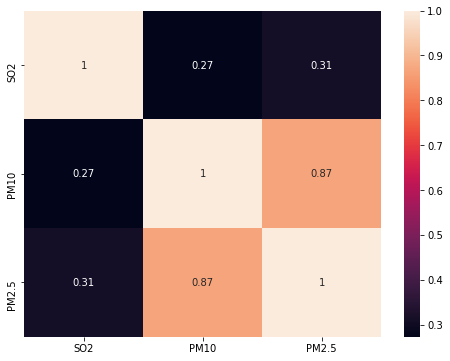

In [70]:
sydney.describe()
plt.figure(figsize = (8, 6))
sns.heatmap(sydney.corr(), annot = True)

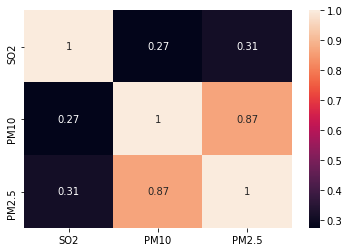

In [311]:
sns.heatmap(sydney.corr(), annot = True)

In [313]:
sydney['Date'] = pd.to_datetime(sydney['Date'], format='%d/%m/%Y')

In [320]:
sydney.columns = ['Date', 'Sydney_SO2', 'Sydney_PM10', 'Sydney_PM2.5']

In [321]:
v1DF.columns =['latitude', 'longitude', 'bright_ti4', 'bright_ti5', 'frp', 'daynight',
       'scan', 'track', 'Date', 'confidence']

In [323]:
# v1DF = pd.merge(v1DF, sydney, how='inner', on='Date')

In [327]:
v1DF.head()

latitude  longitude  bright_ti4  bright_ti5  frp daynight  scan  track  \
0 -42.69706  147.70634       333.6       293.4  4.0        D  0.57   0.43   
1 -42.26889  147.31104       336.2       296.9  3.9        D  0.39   0.44   
2 -40.85202  145.38068       327.9       295.3  3.7        D  0.46   0.47   
3 -42.39329  147.47144       346.9       294.2  6.2        D  0.38   0.43   
4 -42.69701  147.70584       334.1       293.5  4.1        D  0.56   0.43   

        Date confidence  
0 2019-10-01          n  
1 2019-10-01          n  
2 2019-10-01          n  
3 2019-10-01          n  
4 2019-10-01          n

In [71]:
sydney.head()

Date       SO2       PM10      PM2.5
2  01/08/2019  0.060000  15.192857   7.528304
3  02/08/2019  0.063636  18.740000   9.594332
4  03/08/2019  0.066667  16.775000  11.696759
5  04/08/2019  0.008333  15.768750   9.237616
6  05/08/2019  0.136364  23.206667  12.473119

# now read in Brisbane air quality input

In [72]:
brisbaneDF = pd.read_csv('Brisbane.csv')

In [73]:
brisbaneDF.tail(5)

Station            Datetime (UTC)    Parameter  Measurement  \
30897  South Brisbane  2019-07-31T19:00:00.000Z  Temperature         13.5   
30898  South Brisbane  2019-07-31T18:00:00.000Z  Temperature         13.4   
30899  South Brisbane  2019-07-31T17:00:00.000Z  Temperature         13.6   
30900  South Brisbane  2019-07-31T16:00:00.000Z  Temperature         14.0   
30901  South Brisbane  2019-07-31T15:00:00.000Z  Temperature         14.2   

      Measurement units  Measurement running average  \
30897                °C                         13.5   
30898                °C                         13.4   
30899                °C                         13.6   
30900                °C                         14.0   
30901                °C                         14.2   

      Measurement running average units Validated  
30897                   deg C (1hr avg)         Y  
30898                   deg C (1hr avg)         Y  
30899                   deg C (1hr avg)         Y  
30900                   deg C (1hr avg)         Y  
30901                   deg C (1hr avg)         Y

In [76]:
brisbaneDF['Station'].value_counts()
brisbaneDF.drop(['Station', 'Validated', 'Measurement running average', 'Measurement units', 'Measurement running average units'], axis = 1, inplace = True)

KeyError: 'Station'

In [79]:
brisbaneDF['Datetime (UTC)'].min()

'2019-07-31T15:00:00.000Z'

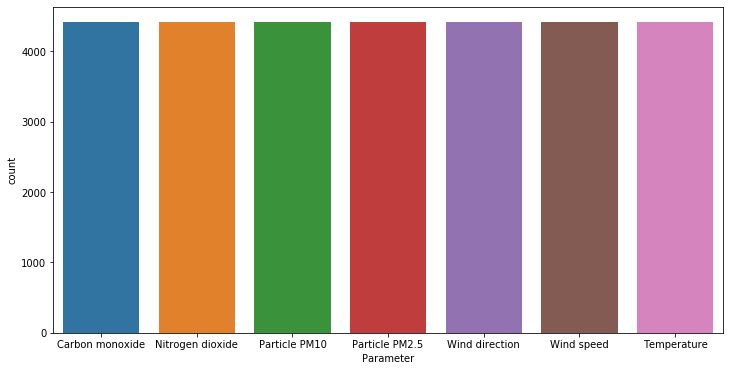

In [80]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Parameter', data = brisbaneDF)

In [81]:
brisbaneDF['Date'] = brisbaneDF['Datetime (UTC)'].apply(lambda x: x.split('T')[0])

In [82]:
brisbaneDF.drop(['Datetime (UTC)'], axis = 1, inplace = True)
brisbaneDF['Date'] = pd.to_datetime(brisbaneDF['Date'])

In [83]:
brisbaneDF.head()

Parameter  Measurement       Date
0  Carbon monoxide          0.0 2020-01-31
1  Carbon monoxide          0.0 2020-01-31
2  Carbon monoxide          0.0 2020-01-31
3  Carbon monoxide          0.0 2020-01-31
4  Carbon monoxide          0.0 2020-01-31

In [84]:
meanedBrisbane = brisbaneDF.groupby(['Date', 'Parameter']).mean()

In [85]:
meanedBrisbane.head(10)

Measurement
Date       Parameter                    
2019-07-31 Carbon monoxide      0.100000
           Nitrogen dioxide     0.016889
           Particle PM10        9.266667
           Particle PM2.5       3.477778
           Temperature         14.300000
           Wind direction     232.222222
           Wind speed           1.666667
2019-08-01 Carbon monoxide      0.154167
           Nitrogen dioxide     0.022000
           Particle PM10       13.120833

In [86]:
brisbaneDF.head()

Parameter  Measurement       Date
0  Carbon monoxide          0.0 2020-01-31
1  Carbon monoxide          0.0 2020-01-31
2  Carbon monoxide          0.0 2020-01-31
3  Carbon monoxide          0.0 2020-01-31
4  Carbon monoxide          0.0 2020-01-31

In [87]:
brisbane = pd.DataFrame(data = brisbaneDF['Date'].unique())
brisbane.columns = ['Date']

In [88]:
meanedBrisbane.loc[('2019-07-31',  'Carbon monoxide')]
meanedBrisbane.head(12)

Measurement
Date       Parameter                    
2019-07-31 Carbon monoxide      0.100000
           Nitrogen dioxide     0.016889
           Particle PM10        9.266667
           Particle PM2.5       3.477778
           Temperature         14.300000
           Wind direction     232.222222
           Wind speed           1.666667
2019-08-01 Carbon monoxide      0.154167
           Nitrogen dioxide     0.022000
           Particle PM10       13.120833
           Particle PM2.5       4.775000
           Temperature         16.529167

In [89]:
meanedBrisbane.loc[(brisbane['Date'].iloc[0], 'Carbon monoxide')] 

Measurement    0.0
Name: (2020-01-31 00:00:00, Carbon monoxide), dtype: float64

In [90]:
def getCOLevel(dateObj):
    return meanedBrisbane.loc[(dateObj, 'Carbon monoxide')]

def getNO2Level(dateObj):
    return meanedBrisbane.loc[(dateObj, 'Nitrogen dioxide')]

def getPM10Level(dateObj):
    return meanedBrisbane.loc[(dateObj, 'Particle PM10')]

def getPM2_5Level(dateObj):
    return meanedBrisbane.loc[(dateObj, 'Particle PM2.5')]

def getTemp(dateObj):
    return meanedBrisbane.loc[(dateObj, 'Temperature')]

In [91]:
brisbane['Carbon monoxide'] = brisbane['Date'].apply(getCOLevel)
brisbane['Nitrogen dioxide'] = brisbane['Date'].apply(getNO2Level)
brisbane['PM10'] = brisbane['Date'].apply(getPM10Level)
brisbane['PM2.5'] = brisbane['Date'].apply(getPM2_5Level)
brisbane['Temperature'] = brisbane['Date'].apply(getTemp)

In [92]:
brisbane.head()

Date  Carbon monoxide  Nitrogen dioxide       PM10     PM2.5  \
0 2020-01-31         0.000000          0.007786  20.642857  5.214286   
1 2020-01-30         0.020833          0.008708  16.595833  4.937500   
2 2020-01-29         0.000000          0.007917  16.487500  5.650000   
3 2020-01-28         0.008333          0.007167  17.062500  6.020833   
4 2020-01-27         0.008333          0.004583  14.325000  5.516667   

   Temperature  
0    28.707143  
1    27.804167  
2    29.120833  
3    28.175000  
4    27.237500

In [93]:
brisbane.columns = ['Date', 'Brisbane_CO', 'Brisbane_NO2', 'Brisbane_PM10', 'Brisbane_PM2.5', 'Brisbane_temp']

In [94]:
brisbane

Date  Brisbane_CO  Brisbane_NO2  Brisbane_PM10  Brisbane_PM2.5  \
0   2020-01-31     0.000000      0.007786      20.642857        5.214286   
1   2020-01-30     0.020833      0.008708      16.595833        4.937500   
2   2020-01-29     0.000000      0.007917      16.487500        5.650000   
3   2020-01-28     0.008333      0.007167      17.062500        6.020833   
4   2020-01-27     0.008333      0.004583      14.325000        5.516667   
..         ...          ...           ...            ...             ...   
180 2019-08-04     0.241667      0.020083      15.550000        8.050000   
181 2019-08-03     0.237500      0.017500      15.266667        8.229167   
182 2019-08-02     0.145833      0.017917      12.362500        4.912500   
183 2019-08-01     0.154167      0.022000      13.120833        4.775000   
184 2019-07-31     0.100000      0.016889       9.266667        3.477778   

     Brisbane_temp  
0        28.707143  
1        27.804167  
2        29.120833  
3        28.175000  
4        27.237500  
..             ...  
180      17.070833  
181      16.616667  
182      16.170833  
183      16.529167  
184      14.300000  

[185 rows x 6 columns]

### now read in Adelaide dataset

In [95]:
adl08 = pd.read_csv('Adelaide/ADL07p_1hr201908.csv')
adl09 = pd.read_csv('Adelaide/ADL07p_1hr201909.csv')
adl10 = pd.read_csv('Adelaide/ADL07p_1hr201910.csv')
adl11 = pd.read_csv('Adelaide/ADL07p_1hr201911.csv')
adl12 = pd.read_csv('Adelaide/ADL07p_1hr201912.csv')
adl01 = pd.read_csv('Adelaide/ADL07p_1hr202001.csv')

In [96]:
adl11.tail()

Date/Time  PM10 BAM ug/m3  PM2.5 BAM ug/m3  Temperature Deg C  \
715  30/11/2019 20:00            17.4              4.1               13.7   
716  30/11/2019 21:00            22.6              4.8               13.3   
717  30/11/2019 22:00            16.4              6.5               13.4   
718  30/11/2019 23:00            19.8              3.3               13.2   
719    1/12/2019 0:00            20.5              0.6               12.9   

     Barometric Pressure atm  
715                    1.000  
716                    1.000  
717                    1.000  
718                    0.999  
719                    0.999

In [97]:
adelaideDF = pd.concat([adl08, adl09, adl10, adl11, adl12, adl01])

In [98]:
adelaideDF.drop('Barometric Pressure atm', axis = 1, inplace=True)

In [99]:
adelaideDF['Date'] = adelaideDF['Date/Time'].apply(lambda x: x.split(' ')[0])

In [100]:
adelaideDF['Date'] = pd.to_datetime(adelaideDF['Date'],format='%d/%m/%Y')

In [575]:
adelaideDF.drop('Date/Time', axis = 1, inplace = True)

In [576]:
adelaide = pd.DataFrame(data = adelaideDF['Date'].unique())
adelaide.columns = ['Date']
adelaideDF = adelaideDF.groupby('Date').mean()

In [577]:
def getPM10Level(dateObj):
    return adelaideDF.loc[(dateObj, 'PM10 BAM ug/m3')]

def getPM2_5Level(dateObj):
    return adelaideDF.loc[(dateObj, 'PM2.5 BAM ug/m3')]

def getTemp(dateObj):
    return adelaideDF.loc[(dateObj, 'Temperature Deg C')]

In [578]:
adelaide['adelaide_PM10'] = adelaide['Date'].apply(getPM10Level)
adelaide['adelaide_PM2.5'] = adelaide['Date'].apply(getPM2_5Level)
adelaide['adelaide_temp'] = adelaide['Date'].apply(getTemp)

In [579]:
adelaide

Date  adelaide_PM10  adelaide_PM2.5  adelaide_temp
0   2019-08-01       9.619048        4.245455       9.713043
1   2019-08-02      10.441667        4.850000      10.133333
2   2019-08-03       9.083333        5.273913      11.066667
3   2019-08-04       7.859091        4.427273      11.520833
4   2019-08-05      10.970833        3.162500      13.316667
..         ...            ...             ...            ...
180 2020-01-28      16.695833        7.495652      20.879167
181 2020-01-29      16.634783        5.445000      27.191667
182 2020-01-30      19.195455        6.145000      33.187500
183 2020-01-31      43.941667        9.339130      28.133333
184 2020-02-01            NaN             NaN      22.200000

[185 rows x 4 columns]

In [581]:
sydney

Date  Sydney_SO2  Sydney_PM10  Sydney_PM2.5
2   2019-08-01    0.060000    15.192857      7.528304
3   2019-08-02    0.063636    18.740000      9.594332
4   2019-08-03    0.066667    16.775000     11.696759
5   2019-08-04    0.008333    15.768750      9.237616
6   2019-08-05    0.136364    23.206667     12.473119
..         ...         ...          ...           ...
181 2020-01-27    0.045455    40.253333     21.264635
182 2020-01-28    0.127273    29.813333     12.796506
183 2020-01-29    0.000000    32.481250     18.045956
184 2020-01-30    0.058333    28.206250     13.614699
185 2020-01-31    0.269231    28.093750     12.853499

[184 rows x 4 columns]

In [582]:
brisbane

Date  Brisbane_CO  Brisbane_NO2  Brisbane_PM10  Brisbane_PM2.5  \
0   2020-01-31     0.000000      0.007786      20.642857        5.214286   
1   2020-01-30     0.020833      0.008708      16.595833        4.937500   
2   2020-01-29     0.000000      0.007917      16.487500        5.650000   
3   2020-01-28     0.008333      0.007167      17.062500        6.020833   
4   2020-01-27     0.008333      0.004583      14.325000        5.516667   
..         ...          ...           ...            ...             ...   
180 2019-08-04     0.241667      0.020083      15.550000        8.050000   
181 2019-08-03     0.237500      0.017500      15.266667        8.229167   
182 2019-08-02     0.145833      0.017917      12.362500        4.912500   
183 2019-08-01     0.154167      0.022000      13.120833        4.775000   
184 2019-07-31     0.100000      0.016889       9.266667        3.477778   

     Brisbane_temp  
0        28.707143  
1        27.804167  
2        29.120833  
3        28.175000  
4        27.237500  
..             ...  
180      17.070833  
181      16.616667  
182      16.170833  
183      16.529167  
184      14.300000  

[185 rows x 6 columns]

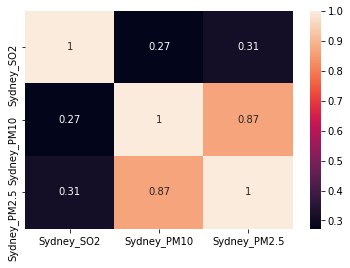

In [584]:
sns.heatmap(sydney.corr(), annot = True)

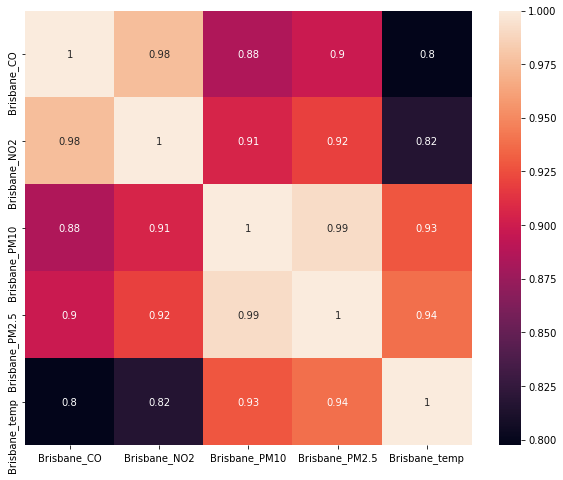

In [588]:
plt.figure(figsize = (10, 8))
sns.heatmap(brisbane.corr(), annot = True)

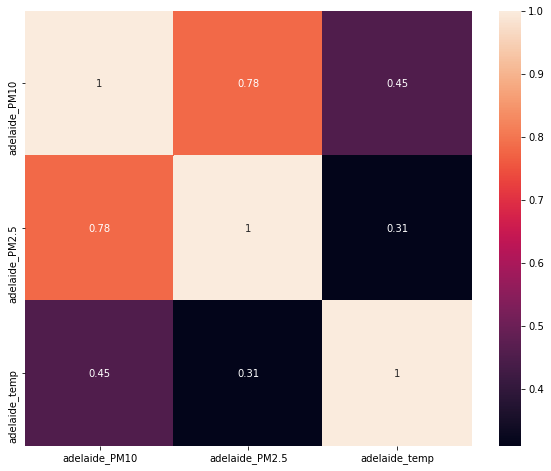

In [589]:
plt.figure(figsize = (10, 8))
sns.heatmap(adelaide.corr(), annot = True)

Here is the end of data cleaning and engineering, we now want to use the data for the following purposes:
1. Visualize the fire using geological plotting, to document the fire region change.
2. Explore the relationship between the airquality of sydney, adelaide, brisbane and the wildfire locations and strengths. A regression prediction. 

# Geological Visualization

In [600]:
v1DF.head()

latitude  longitude  bright_ti4  bright_ti5  frp daynight  scan  track  \
0 -42.69706  147.70634       333.6       293.4  4.0        D  0.57   0.43   
1 -42.26889  147.31104       336.2       296.9  3.9        D  0.39   0.44   
2 -40.85202  145.38068       327.9       295.3  3.7        D  0.46   0.47   
3 -42.39329  147.47144       346.9       294.2  6.2        D  0.38   0.43   
4 -42.69701  147.70584       334.1       293.5  4.1        D  0.56   0.43   

        Date confidence  
0 2019-10-01          n  
1 2019-10-01          n  
2 2019-10-01          n  
3 2019-10-01          n  
4 2019-10-01          n

We first visualize the data geographically using various scatterplots. 

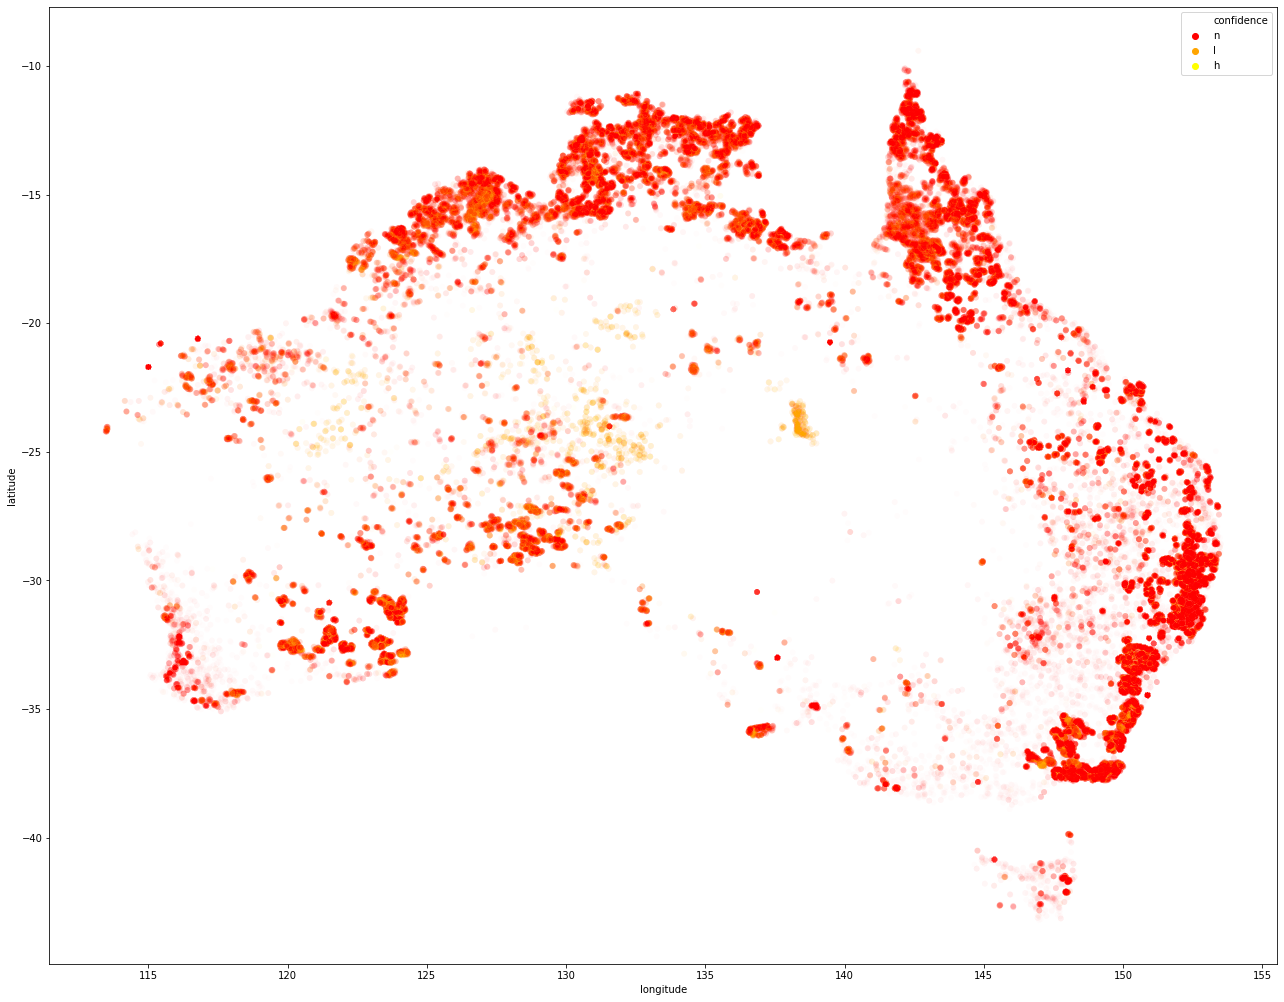

In [622]:
plt.figure(figsize = (22, 17.6))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
myColors = ['red', 'orange', 'yellow']
sns.scatterplot(x = 'longitude', y = 'latitude', 
                data = v1DF, alpha = 0.01, palette=myColors, 
                markers='+', hue = 'confidence')

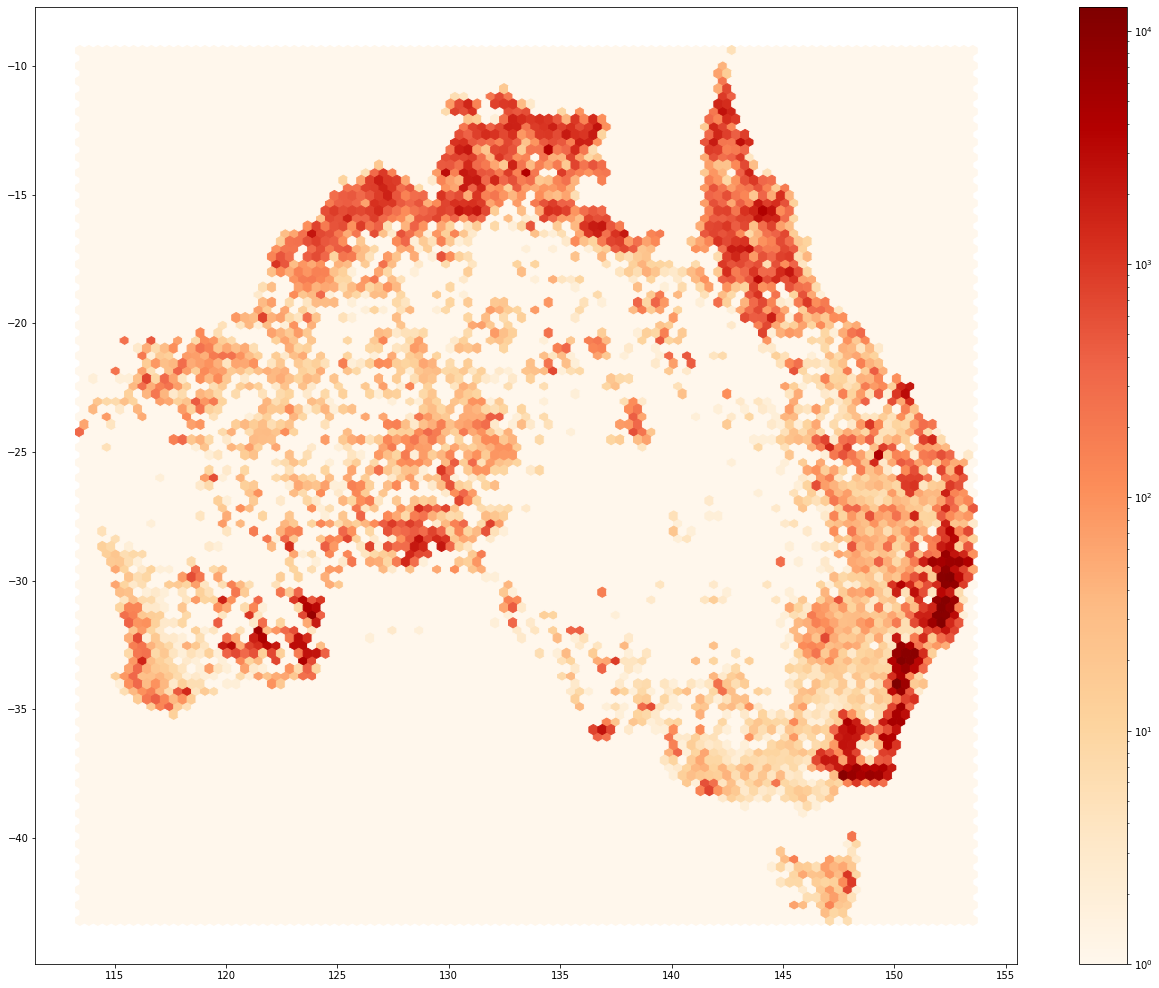

In [101]:
plt.figure(figsize=(22, 17.6))
plt.hexbin(v1DF.longitude, v1DF.latitude, bins = 'log', cmap="OrRd")
plt.colorbar()

We now want to adjust the map's color according to the brightness of each fire.

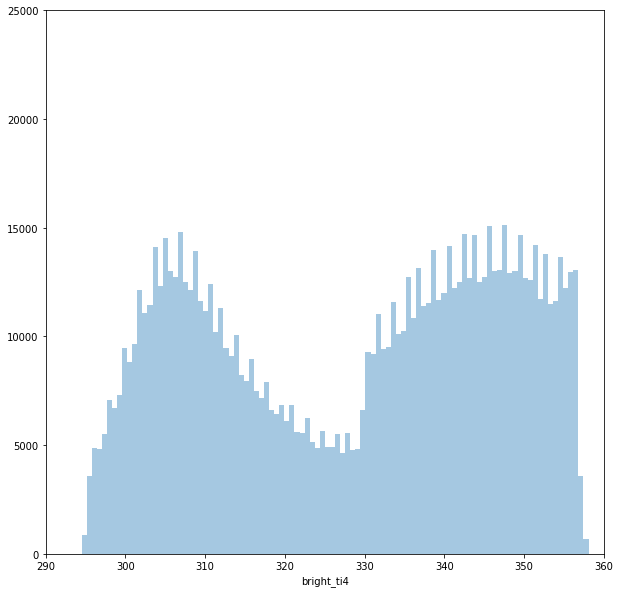

In [106]:
plt.figure(figsize=(10, 10))
plt.xlim(290, 360)
plt.ylim(0, 25000)
sns.distplot(a = v1DF['bright_ti4'],bins = 250, kde = False)

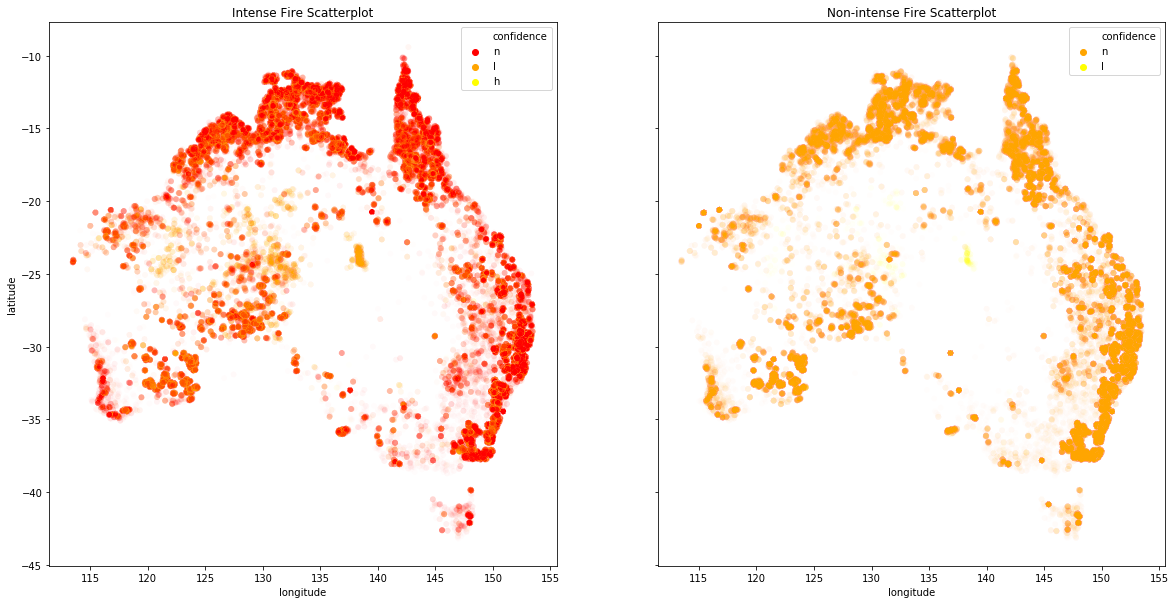

In [107]:
# Judging from the difference of the brightness i4, 
# we categorize the fire to be intense/not intense with a threshold of 330
# Then we have 
myColors = ['red', 'orange', 'yellow']
myColors2 = ['orange', 'yellow']
fig, (ax1, ax2) = plt.subplots(ncols = 2, sharey = True, figsize=(20, 10))
sns.scatterplot(x = 'longitude', y = 'latitude', 
                data = v1DF[v1DF['bright_ti4'] >= 330], alpha = 0.01, palette=myColors, 
                markers='+', hue = 'confidence', ax=ax1)
sns.scatterplot(x = 'longitude', y = 'latitude', 
                data = v1DF[v1DF['bright_ti4'] < 330], alpha = 0.01, palette=myColors2, 
                markers='+', hue = 'confidence', ax=ax2)
ax1.set_title('Intense Fire Scatterplot')
ax2.set_title('Non-intense Fire Scatterplot')
plt.show()

In [665]:
import folium
# init map at Sydney
fireMap = folium.Map(location=[-33.8688, 151.2093], tiles='Stamen Terrain', zoom_start=4)

def mapColor(brightI4):
    if (float(brightI4) > 330):
        return 'red'
    else:
        return 'orange'

# Create mechanism for color mapping
v1DF['brightnessMap'] = v1DF['bright_ti4'].apply(mapColor)
for i in range (0, 5000):
    folium.Circle(location=[v1DF.iloc[i]['latitude'], v1DF.iloc[i]['longitude']], 
                 radius = 40 * v1DF.iloc[i]['bright_ti4'],
                 color = v1DF.iloc[i]['brightnessMap']).add_to(fireMap)
    
fireMap

### Explore the relationship between the airquality of sydney, adelaide, brisbane and the wildfire locations and strengths. A regression prediction. 

In [102]:
v1DF.drop('brightnessMap', axis = 1, inplace = True)

KeyError: "['brightnessMap'] not found in axis"

ValueError: Could not interpret input 'Sydney_SO2'

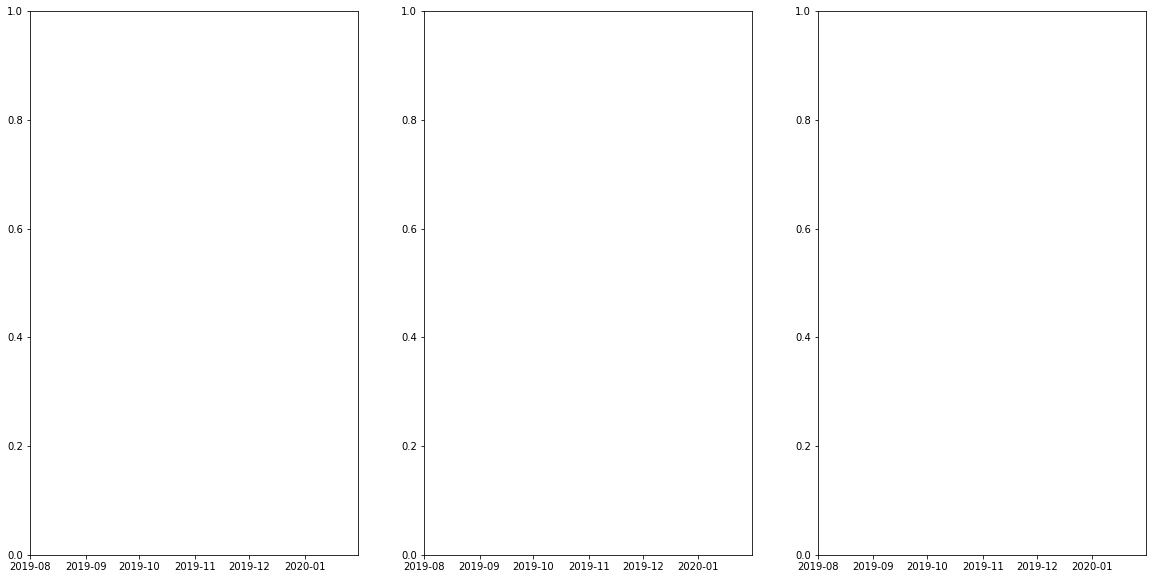

In [108]:
from datetime import datetime
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 10), sharex = True)
plt.xlim(datetime.strptime('2019/08/01', '%Y/%m/%d'), datetime.strptime('2020/01/31', '%Y/%m/%d'))
sns.scatterplot(x='Date', y='Sydney_SO2', data = sydney, ax=ax1)
sns.scatterplot(x='Date', y='Sydney_PM10', data = sydney, ax=ax2)
sns.scatterplot(x='Date', y = 'Sydney_PM2.5', data = sydney, ax = ax3)
ax1.set_title('Sydney_SO2')
ax2.set_title('Sydney_PM10')
ax3.set_title('Sydney_PM2.5')
plt.show()

In [710]:
# Since there are negative values in the dataset, we first clean the data.
brisbane['Brisbane_CO'] = brisbane['Brisbane_CO'].apply(lambda x: float(x) if float(x) >=0 else 0)
brisbane['Brisbane_NO2'] = brisbane['Brisbane_NO2'].apply(lambda x: float(x) if float(x) >=0 else 0)
brisbane['Brisbane_PM10'] = brisbane['Brisbane_PM10'].apply(lambda x: float(x) if float(x) >=0 else 0)
brisbane['Brisbane_PM2.5'] = brisbane['Brisbane_PM2.5'].apply(lambda x: float(x) if float(x) >=0 else 0)

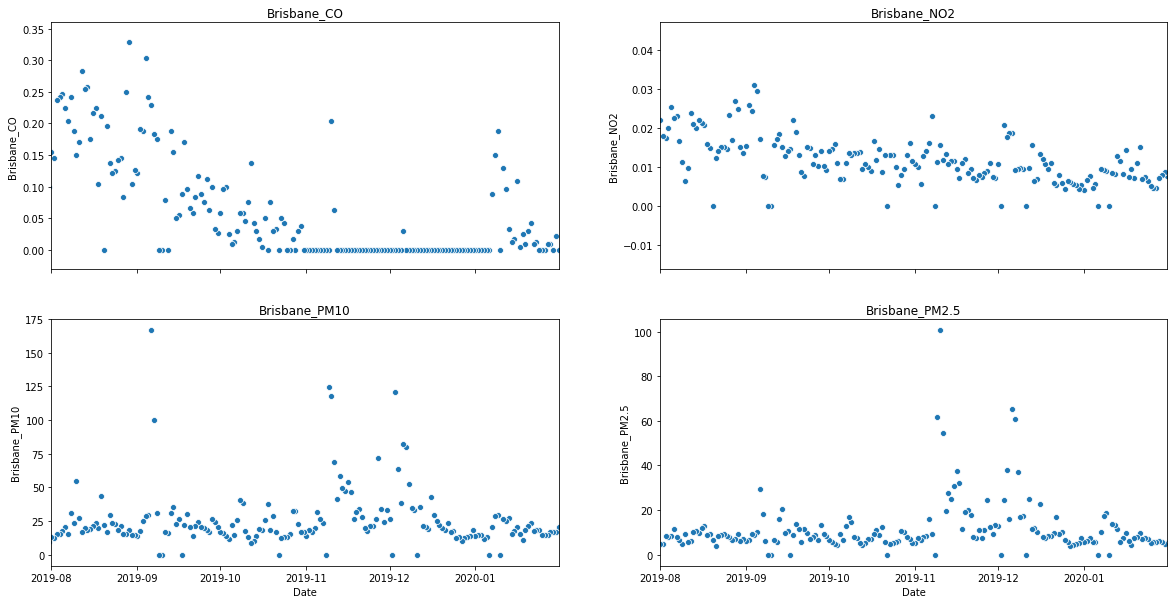

In [711]:
fig, axes = plt.subplots(2,2, figsize=(20, 10), sharex = True)
plt.xlim(datetime.strptime('2019/08/01', '%Y/%m/%d'), datetime.strptime('2020/01/31', '%Y/%m/%d'))
sns.scatterplot(x='Date', y='Brisbane_CO', data = brisbane, ax=axes[0, 0])
sns.scatterplot(x='Date', y='Brisbane_NO2', data = brisbane, ax=axes[0, 1])
sns.scatterplot(x='Date', y = 'Brisbane_PM10', data = brisbane, ax = axes[1, 0])
sns.scatterplot(x='Date', y = 'Brisbane_PM2.5', data = brisbane, ax = axes[1, 1])
axes[0, 0].set_title('Brisbane_CO')
axes[0, 1].set_title('Brisbane_NO2')
axes[1, 0].set_title('Brisbane_PM10')
axes[1, 1].set_title('Brisbane_PM2.5')
plt.show()

In [105]:
adelaide['adelaide_PM10'] = adelaide['adelaide_PM10'].fillna(adelaide['adelaide_PM10'].mean())
adelaide['adelaide_PM2.5'] = adelaide['adelaide_PM2.5'].fillna(adelaide['adelaide_PM2.5'].mean())
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20, 7), sharex = True)
plt.xlim(datetime.strptime('2019/08/01', '%Y/%m/%d'), datetime.strptime('2020/01/31', '%Y/%m/%d'))
sns.scatterplot(x='Date', y='adelaide_PM10', data = adelaide, ax=ax1)
sns.scatterplot(x='Date', y='adelaide_PM2.5', data = adelaide, ax=ax2)
ax1.set_title('adelaide_PM10')
ax2.set_title('adelaide_PM2.5')
plt.show()

NameError: name 'adelaide' is not defined

In [720]:
airQuality = pd.merge(sydney, brisbane, on='Date')

In [723]:
airQuality = pd.merge(airQuality, adelaide, on='Date')

In [724]:
airQuality.head()

Date  Sydney_SO2  Sydney_PM10  Sydney_PM2.5  Brisbane_CO  \
0 2019-08-01    0.060000    15.192857      7.528304     0.154167   
1 2019-08-02    0.063636    18.740000      9.594332     0.145833   
2 2019-08-03    0.066667    16.775000     11.696759     0.237500   
3 2019-08-04    0.008333    15.768750      9.237616     0.241667   
4 2019-08-05    0.136364    23.206667     12.473119     0.245833   

   Brisbane_NO2  Brisbane_PM10  Brisbane_PM2.5  Brisbane_temp  adelaide_PM10  \
0      0.022000      13.120833        4.775000      16.529167       9.619048   
1      0.017917      12.362500        4.912500      16.170833      10.441667   
2      0.017500      15.266667        8.229167      16.616667       9.083333   
3      0.020083      15.550000        8.050000      17.070833       7.859091   
4      0.025375      17.720833        8.225000      16.783333      10.970833   

   adelaide_PM2.5  adelaide_temp  
0        4.245455       9.713043  
1        4.850000      10.133333  
2        5.273913      11.066667  
3        4.427273      11.520833  
4        3.162500      13.316667

In [104]:
plt.figure(figsize = (12, 9))
sns.heatmap(airQuality.corr(), annot = True)

NameError: name 'airQuality' is not defined

<Figure size 864x648 with 0 Axes>

In [734]:
v1DF.head()

latitude  longitude  bright_ti4  bright_ti5  frp daynight  scan  track  \
0 -42.69706  147.70634       333.6       293.4  4.0        D  0.57   0.43   
1 -42.26889  147.31104       336.2       296.9  3.9        D  0.39   0.44   
2 -40.85202  145.38068       327.9       295.3  3.7        D  0.46   0.47   
3 -42.39329  147.47144       346.9       294.2  6.2        D  0.38   0.43   
4 -42.69701  147.70584       334.1       293.5  4.1        D  0.56   0.43   

        Date confidence  brightnessTemp  
0 2019-10-01          n               1  
1 2019-10-01          n               1  
2 2019-10-01          n               0  
3 2019-10-01          n               1  
4 2019-10-01          n               1

We want to transform the data in the v1DF dataframe using the following rules:
For a given day D, assume there are $n$ observed fire instaces $f_{1}, ..., f_{n}$.

We first calculate the distance between the fire and the target city, for example, Sydney.
Then $d_{f} = ||(x_{sydney}, y_{sydney}), (x_{f}, y_{f})||$.

For a given day, we define:
- Confidence factor $c$: low = 1, nominal = 4, high = 6. 
- the fire distance factor $\sum_{i=1}^{n} \frac{200}{d_{f_{i}}}$.
- the brightness factor  $\sum_{i=1}^{n} \frac{c_{i}(I4_{i} + I5_{i})}{2d_{f_{i}}}$.
- the radiative power factor $\sum_{i=1}^{n} \frac{c_{i}frp_{i}}{d_{f_{i}}}$.

Given the coordinates of Sydney(-33.8688, 151.2093), Brisbane(-27.4698, 153.0251) and Adelaide (-34.9285, 138.6007), we apply the transformation above to each city and transform the v1DF dataframe to have 3 columns. 

In [103]:
v1Factors = pd.DataFrame(data = v1DF['Date'].unique())
v1Factors.columns = ['Date']

KeyError: 'Date'

In [762]:
v1Factors['Sydney_distance'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Sydney_brightness'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Sydney_radiative'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors.index = v1Factors['Date']

In [784]:
def convertConfidence(level):
    if (level == 'l'):
        return 1
    elif (level == 'n'):
        return 4
    elif (level == 'h'):
        return 6
    
v1DF['confidence'] = v1DF['confidence'].apply(convertConfidence)

In [785]:
v1DF.head()

latitude  longitude  bright_ti4  bright_ti5  frp daynight  scan  track  \
0 -42.69706  147.70634       333.6       293.4  4.0        D  0.57   0.43   
1 -42.26889  147.31104       336.2       296.9  3.9        D  0.39   0.44   
2 -40.85202  145.38068       327.9       295.3  3.7        D  0.46   0.47   
3 -42.39329  147.47144       346.9       294.2  6.2        D  0.38   0.43   
4 -42.69701  147.70584       334.1       293.5  4.1        D  0.56   0.43   

        Date  confidence  brightnessTemp  
0 2019-10-01           4               1  
1 2019-10-01           4               1  
2 2019-10-01           4               0  
3 2019-10-01           4               1  
4 2019-10-01           4               1

In [788]:
for index, row in v1DF.iterrows():
    x = float(row['latitude'])
    y = float(row['longitude'])
    dist = ((x - (0 - 33.8688))**2 + (y - 151.2093)**2)**0.5
    distFactor = 200/dist
    v1Factors.loc[row['Date'], 'Sydney_distance'] += distFactor
    
    b4 = float(row['bright_ti4'])
    b5 = float(row['bright_ti5'])
    c = row['confidence']
    bfactor = ((b4 + b5) * c) / (2 * distFactor)
    v1Factors.loc[row['Date'], 'Sydney_brightness'] += bfactor
    
    frp = float(row['frp'])
    frpFactor = frp * c / distFactor
    v1Factors.loc[row['Date'], 'Sydney_radiative'] += frpFactor

In [789]:
v1Factors.head()

Date  Sydney_distance  Sydney_brightness  Sydney_radiative
Date                                                                       
2019-10-01 2019-10-01     48132.217518       6.513303e+05      31160.329856
2019-10-02 2019-10-02     34920.106989       4.241556e+05      20013.305255
2019-10-03 2019-10-03     46292.148306       5.225388e+05      23282.740197
2019-10-04 2019-10-04     67785.645511       9.093577e+05      42935.863699
2019-10-05 2019-10-05     58335.517576       1.005179e+06      46732.351663

In [790]:
v1Factors['Brisbane_distance'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Brisbane_brightness'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Brisbane_radiative'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors.head()

Date  Sydney_distance  Sydney_brightness  Sydney_radiative  \
Date                                                                          
2019-10-01 2019-10-01     48132.217518       6.513303e+05      31160.329856   
2019-10-02 2019-10-02     34920.106989       4.241556e+05      20013.305255   
2019-10-03 2019-10-03     46292.148306       5.225388e+05      23282.740197   
2019-10-04 2019-10-04     67785.645511       9.093577e+05      42935.863699   
2019-10-05 2019-10-05     58335.517576       1.005179e+06      46732.351663   

            Brisbane_distance  Brisbane_brightness  Brisbane_radiative  
Date                                                                    
2019-10-01                  0                    0                   0  
2019-10-02                  0                    0                   0  
2019-10-03                  0                    0                   0  
2019-10-04                  0                    0                   0  
2019-10-05                  0                    0                   0

In [791]:
v1DF.head()

latitude  longitude  bright_ti4  bright_ti5  frp daynight  scan  track  \
0 -42.69706  147.70634       333.6       293.4  4.0        D  0.57   0.43   
1 -42.26889  147.31104       336.2       296.9  3.9        D  0.39   0.44   
2 -40.85202  145.38068       327.9       295.3  3.7        D  0.46   0.47   
3 -42.39329  147.47144       346.9       294.2  6.2        D  0.38   0.43   
4 -42.69701  147.70584       334.1       293.5  4.1        D  0.56   0.43   

        Date  confidence  brightnessTemp  
0 2019-10-01           4               1  
1 2019-10-01           4               1  
2 2019-10-01           4               0  
3 2019-10-01           4               1  
4 2019-10-01           4               1

In [792]:
for index, row in v1DF.iterrows():
    x = float(row['latitude'])
    y = float(row['longitude'])
    dist = ((x - (0 - 27.4698))**2 + (y - 153.0251)**2)**0.5
    distFactor = 200/dist
    v1Factors.loc[row['Date'], 'Brisbane_distance'] += distFactor
    
    b4 = float(row['bright_ti4'])
    b5 = float(row['bright_ti5'])
    c = row['confidence']
    bfactor = ((b4 + b5) * c) / (2 * distFactor)
    v1Factors.loc[row['Date'], 'Brisbane_brightness'] += bfactor
    
    frp = float(row['frp'])
    frpFactor = frp * c / distFactor
    v1Factors.loc[row['Date'], 'Brisbane_radiative'] += frpFactor

In [793]:
v1Factors.head()

Date  Sydney_distance  Sydney_brightness  Sydney_radiative  \
Date                                                                          
2019-10-01 2019-10-01     48132.217518       6.513303e+05      31160.329856   
2019-10-02 2019-10-02     34920.106989       4.241556e+05      20013.305255   
2019-10-03 2019-10-03     46292.148306       5.225388e+05      23282.740197   
2019-10-04 2019-10-04     67785.645511       9.093577e+05      42935.863699   
2019-10-05 2019-10-05     58335.517576       1.005179e+06      46732.351663   

            Brisbane_distance  Brisbane_brightness  Brisbane_radiative  
Date                                                                    
2019-10-01       50004.699088        582455.394517        27907.089793  
2019-10-02       39998.384469        384602.865734        18208.083430  
2019-10-03       56293.854629        460523.746009        21008.112150  
2019-10-04       91171.229834        864639.529573        42358.763405  
2019-10-05       65815.598598        973539.929432        46213.434814

In [796]:
v1Factors['Adelaide_distance'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Adelaide_brightness'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors['Adelaide_radiative'] = v1Factors['Date'].apply(lambda x: 0)
v1Factors.head()

Date  Sydney_distance  Sydney_brightness  Sydney_radiative  \
Date                                                                          
2019-10-01 2019-10-01     48132.217518       6.513303e+05      31160.329856   
2019-10-02 2019-10-02     34920.106989       4.241556e+05      20013.305255   
2019-10-03 2019-10-03     46292.148306       5.225388e+05      23282.740197   
2019-10-04 2019-10-04     67785.645511       9.093577e+05      42935.863699   
2019-10-05 2019-10-05     58335.517576       1.005179e+06      46732.351663   

            Brisbane_distance  Brisbane_brightness  Brisbane_radiative  \
Date                                                                     
2019-10-01       50004.699088        582455.394517        27907.089793   
2019-10-02       39998.384469        384602.865734        18208.083430   
2019-10-03       56293.854629        460523.746009        21008.112150   
2019-10-04       91171.229834        864639.529573        42358.763405   
2019-10-05       65815.598598        973539.929432        46213.434814   

            Adelaide_distance  Adelaide_brightness  Adelaide_radiative  
Date                                                                    
2019-10-01                  0                    0                   0  
2019-10-02                  0                    0                   0  
2019-10-03                  0                    0                   0  
2019-10-04                  0                    0                   0  
2019-10-05                  0                    0                   0

In [797]:
for index, row in v1DF.iterrows():
    x = float(row['latitude'])
    y = float(row['longitude'])
    dist = ((x - (0 - 34.9285))**2 + (y - 138.6007)**2)**0.5
    distFactor = 200/dist
    v1Factors.loc[row['Date'], 'Adelaide_distance'] += distFactor
    
    b4 = float(row['bright_ti4'])
    b5 = float(row['bright_ti5'])
    c = row['confidence']
    bfactor = ((b4 + b5) * c) / (2 * distFactor)
    v1Factors.loc[row['Date'], 'Adelaide_brightness'] += bfactor
    
    frp = float(row['frp'])
    frpFactor = frp * c / distFactor
    v1Factors.loc[row['Date'], 'Adelaide_radiative'] += frpFactor

In [798]:
v1Factors.head()

Date  Sydney_distance  Sydney_brightness  Sydney_radiative  \
Date                                                                          
2019-10-01 2019-10-01     48132.217518       6.513303e+05      31160.329856   
2019-10-02 2019-10-02     34920.106989       4.241556e+05      20013.305255   
2019-10-03 2019-10-03     46292.148306       5.225388e+05      23282.740197   
2019-10-04 2019-10-04     67785.645511       9.093577e+05      42935.863699   
2019-10-05 2019-10-05     58335.517576       1.005179e+06      46732.351663   

            Brisbane_distance  Brisbane_brightness  Brisbane_radiative  \
Date                                                                     
2019-10-01       50004.699088        582455.394517        27907.089793   
2019-10-02       39998.384469        384602.865734        18208.083430   
2019-10-03       56293.854629        460523.746009        21008.112150   
2019-10-04       91171.229834        864639.529573        42358.763405   
2019-10-05       65815.598598        973539.929432        46213.434814   

            Adelaide_distance  Adelaide_brightness  Adelaide_radiative  
Date                                                                    
2019-10-01       49402.094214        540496.128100        25305.596101  
2019-10-02       33498.837313        353272.307608        15981.195746  
2019-10-03       38570.907479        458876.418802        19176.752295  
2019-10-04       79442.356901        654728.526048        27974.670133  
2019-10-05       89684.036557        671146.869782        29301.897205

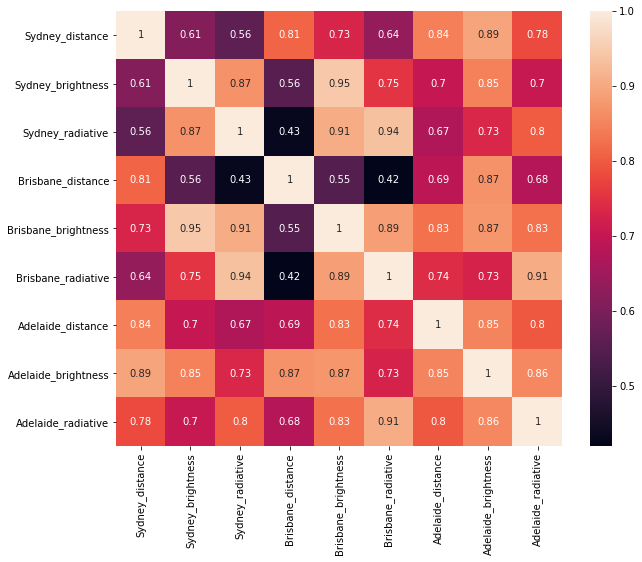

In [804]:
plt.figure(figsize = (10, 8))
sns.heatmap(v1Factors.corr(), annot = True)

In [810]:
v1Factors.reset_index(drop=True, inplace=True)

In [813]:
v1 = pd.merge(v1Factors, airQuality, how='inner', on='Date')

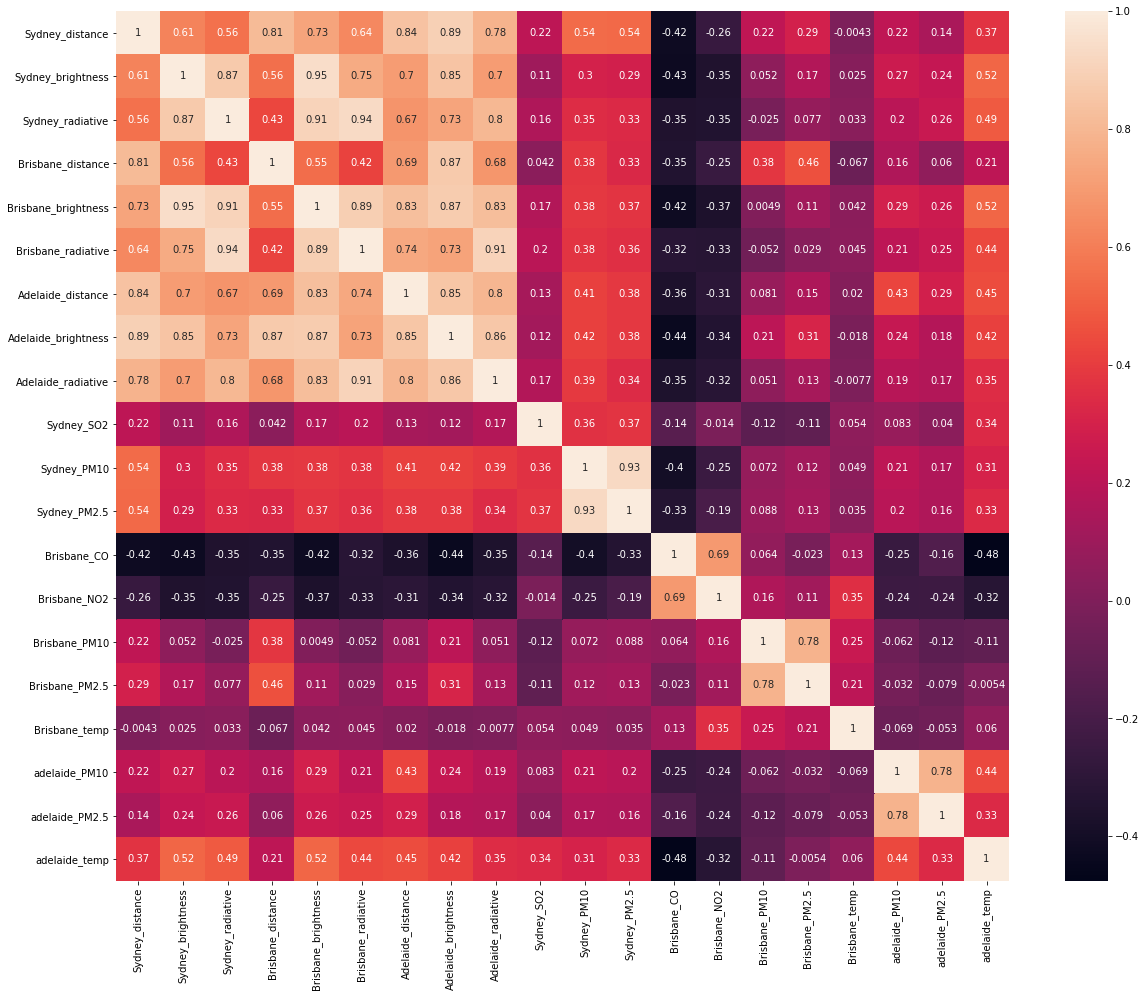

In [819]:
plt.figure(figsize = (20, 16))
sns.heatmap(v1.corr(), annot = True)

In [822]:
v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 163
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 164 non-null    datetime64[ns]
 1   Sydney_distance      164 non-null    float64       
 2   Sydney_brightness    164 non-null    float64       
 3   Sydney_radiative     164 non-null    float64       
 4   Brisbane_distance    164 non-null    float64       
 5   Brisbane_brightness  164 non-null    float64       
 6   Brisbane_radiative   164 non-null    float64       
 7   Adelaide_distance    164 non-null    float64       
 8   Adelaide_brightness  164 non-null    float64       
 9   Adelaide_radiative   164 non-null    float64       
 10  Sydney_SO2           164 non-null    float64       
 11  Sydney_PM10          164 non-null    float64       
 12  Sydney_PM2.5         164 non-null    float64       
 13  Brisbane_CO          164 non-null  

In [897]:
# Looking from the heatmap above, we see that relatively, PM10/2.5 are more affected by the fires.
from sklearn.model_selection import train_test_split
X = v1[['Sydney_distance', 'Sydney_brightness', 'Sydney_radiative']]
y = v1['Sydney_PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [898]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE: 76388.5835402184
MSE: 11774895433.543753
RMSE: 108512.19025318655


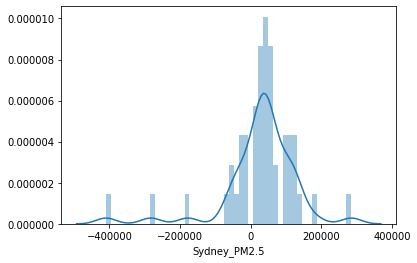

In [899]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
predictions = svr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
sns.distplot(y_test - predictions, bins = 50)

In [900]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

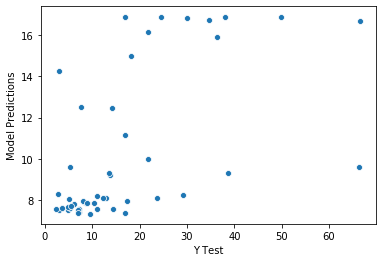

In [901]:
predDF = pd.DataFrame(y_test.values, columns=['Y Test'])
prediction = pd.Series(predictions.reshape(50,))
predDF = pd.concat([predDF, prediction], axis = 1)
predDF.columns = ['Y Test','Model Predictions']
sns.scatterplot(x='Y Test', y = 'Model Predictions', data = predDF)

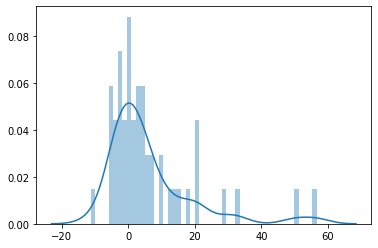

In [902]:
sns.distplot(predDF['Y Test'] - predDF['Model Predictions'], bins = 50)

In [903]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 8.608362618110057
MSE: 212.31821875138317
RMSE: 14.571143357725335


In [904]:
v1.describe()

Sydney_distance  Sydney_brightness  Sydney_radiative  \
count     1.640000e+02       1.640000e+02        164.000000   
mean      3.234160e+05       6.174310e+05      30308.958841   
std       4.625361e+05       3.896765e+05      33437.310413   
min       2.059984e+04       1.133697e+05       2537.141448   
25%       4.437130e+04       3.354608e+05      10232.075358   
50%       1.016892e+05       5.456670e+05      20625.881359   
75%       4.201127e+05       7.596404e+05      34204.140591   
max       2.358352e+06       2.304220e+06     236413.646454   

       Brisbane_distance  Brisbane_brightness  Brisbane_radiative  \
count       1.640000e+02         1.640000e+02          164.000000   
mean        2.194377e+05         6.290566e+05        33001.654294   
std         2.573482e+05         4.934066e+05        46511.268317   
min         2.053980e+04         9.198764e+04         2125.534323   
25%         5.584784e+04         3.071809e+05         9103.531891   
50%         1.047399e+05         5.062871e+05        18942.647403   
75%         3.014393e+05         7.637888e+05        34583.047971   
max         1.890824e+06         2.887091e+06       337642.023983   

       Adelaide_distance  Adelaide_brightness  Adelaide_radiative  Sydney_SO2  \
count         164.000000         1.640000e+02          164.000000  164.000000   
mean       101847.840028         6.902808e+05        31251.031724    0.057957   
std        128176.327839         5.235179e+05        39671.380264    0.060978   
min         12166.753206         1.242757e+05         2079.205822    0.000000   
25%         33349.161533         3.201932e+05         9687.997771    0.008902   
50%         52801.643571         5.220309e+05        21002.936454    0.033333   
75%        116083.790148         9.075636e+05        37798.735204    0.084615   
max        939495.078799         2.636714e+06       336184.947108    0.230769   

       Sydney_PM10  Sydney_PM2.5  Brisbane_CO  Brisbane_NO2  Brisbane_PM10  \
count   164.000000    164.000000   164.000000    164.000000     164.000000   
mean     32.536502     16.312122     0.067290      0.012125      26.546914   
std      26.178694     17.018426     0.085486      0.006176      22.876848   
min       5.871429      2.384766     0.000000      0.000000       0.000000   
25%      15.470313      6.065534     0.000000      0.007917      15.313542   
50%      22.092279      9.482215     0.027627      0.011383      20.777083   
75%      38.427665     17.970703     0.121875      0.015240      29.610417   
max     146.028571    102.557143     0.329167      0.030917     167.033333   

       Brisbane_PM2.5  Brisbane_temp  adelaide_PM10  adelaide_PM2.5  \
count      164.000000     164.000000     164.000000      164.000000   
mean        11.987992      -8.028930      19.328424        7.241371   
std         12.600308     135.348378      12.298444        6.229902   
min          0.000000    -817.945833       7.465217        2.412500   
25%          6.260417      19.246875      12.951875        4.535417   
50%          8.485417      22.434330      16.900000        5.752083   
75%         12.381250      25.436458      20.032292        7.512648   
max        100.825000      30.279167      88.333333       61.620833   

       adelaide_temp  
count     164.000000  
mean       17.231596  
std         6.151682  
min         7.829167  
25%        12.837500  
50%        15.704167  
75%        19.662500  
max        34.162500

In [905]:
# Notice that Sydneys's PM2.5 level has mean of 16.312122, so the RMSE is greater than 50%.
# We now explore other methods.

Text(0, 0.5, 'predictions')

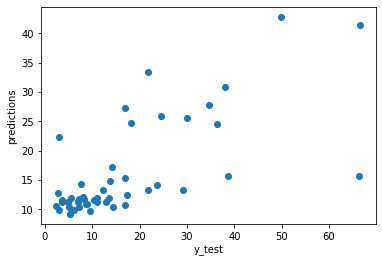

In [906]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

MAE: 7.189387933184032
MSE: 118.08091799266775
RMSE: 10.866504405404148


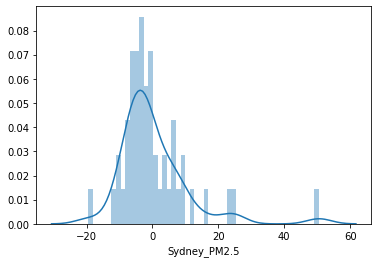

In [907]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
sns.distplot(y_test - predictions, bins = 50)

In [931]:
# This model has better RMSE. Let's look at ANN models
# Notice that Sydneys's PM2.5 level has mean of 16.312122, so the RMSE is 67%.

In [909]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((114, 3), (50, 3))

In [910]:
# first look at rmsprop with earlystopping/without dropout.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(3, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [911]:
earlyStop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=5)
model.fit(x = X_train, 
          y = y_train.values, 
          validation_data=(X_test, y_test.values),
          batch_size = 16, 
          epochs=500,
          verbose = 1,
          callbacks = [earlyStop])

Train on 114 samples, validate on 50 samples
Epoch 1/500
114/114 [==============================] - 0s 3ms/sample - loss: 575.1533 - val_loss: 478.2274
Epoch 2/500
114/114 [==============================] - 0s 134us/sample - loss: 571.6729 - val_loss: 474.6476
Epoch 3/500
114/114 [==============================] - 0s 122us/sample - loss: 568.3695 - val_loss: 471.8795
Epoch 4/500
114/114 [==============================] - 0s 118us/sample - loss: 565.6144 - val_loss: 469.0542
Epoch 5/500
114/114 [==============================] - 0s 122us/sample - loss: 562.7552 - val_loss: 465.9509
Epoch 6/500
114/114 [==============================] - 0s 147us/sample - loss: 559.7278 - val_loss: 463.0713
Epoch 7/500
114/114 [==============================] - 0s 126us/sample - loss: 556.7087 - val_loss: 459.9771
Epoch 8/500
114/114 [==============================] - 0s 127us/sample - loss: 553.5652 - val_loss: 456.3842
Epoch 9/500
114/114 [==============================] - 0s 134us/sample - loss: 549.95

114/114 [==============================] - 0s 135us/sample - loss: 259.8163 - val_loss: 163.4888
Epoch 150/500
114/114 [==============================] - 0s 139us/sample - loss: 259.9764 - val_loss: 163.3202
Epoch 151/500
114/114 [==============================] - 0s 142us/sample - loss: 259.8721 - val_loss: 163.2625
Epoch 152/500
114/114 [==============================] - 0s 144us/sample - loss: 259.4267 - val_loss: 163.1810
Epoch 153/500
114/114 [==============================] - 0s 144us/sample - loss: 259.5124 - val_loss: 163.0269
Epoch 154/500
114/114 [==============================] - 0s 141us/sample - loss: 259.6405 - val_loss: 163.0454
Epoch 155/500
114/114 [==============================] - 0s 143us/sample - loss: 259.1694 - val_loss: 162.9848
Epoch 156/500
114/114 [==============================] - 0s 149us/sample - loss: 259.1671 - val_loss: 162.8131
Epoch 157/500
114/114 [==============================] - 0s 147us/sample - loss: 259.1446 - val_loss: 162.4378
Epoch 158/500
1

Epoch 223/500
114/114 [==============================] - 0s 143us/sample - loss: 252.9909 - val_loss: 152.3775
Epoch 224/500
114/114 [==============================] - 0s 139us/sample - loss: 252.8398 - val_loss: 152.2426
Epoch 225/500
114/114 [==============================] - 0s 138us/sample - loss: 252.8314 - val_loss: 152.1996
Epoch 226/500
114/114 [==============================] - 0s 145us/sample - loss: 252.8551 - val_loss: 152.0519
Epoch 227/500
114/114 [==============================] - 0s 148us/sample - loss: 252.8081 - val_loss: 151.8986
Epoch 228/500
114/114 [==============================] - 0s 158us/sample - loss: 252.9009 - val_loss: 151.8087
Epoch 229/500
114/114 [==============================] - 0s 143us/sample - loss: 252.8502 - val_loss: 151.7657
Epoch 230/500
114/114 [==============================] - 0s 143us/sample - loss: 252.9245 - val_loss: 151.6886
Epoch 231/500
114/114 [==============================] - 0s 143us/sample - loss: 252.6543 - val_loss: 151.6302
E

Epoch 297/500
114/114 [==============================] - 0s 134us/sample - loss: 249.2542 - val_loss: 145.7592
Epoch 298/500
114/114 [==============================] - 0s 142us/sample - loss: 249.5232 - val_loss: 145.9703
Epoch 00298: early stopping


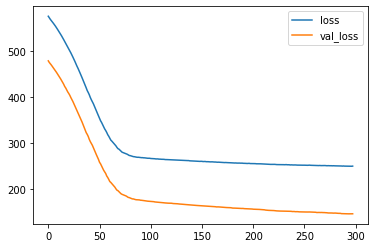

In [912]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

In [913]:
trainScore = model.evaluate(X_train, y_train, verbose = 0)
testScore = model.evaluate(X_test, y_test, verbose = 0)
trainScore, testScore

(249.16418028714364, 145.97029174804686)

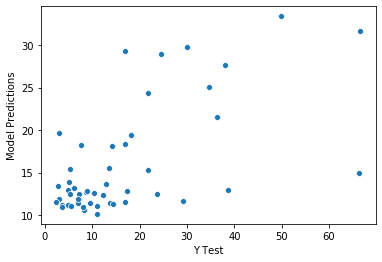

In [914]:
prediction = model.predict(X_test)
predDF = pd.DataFrame(y_test.values, columns=['Y Test'])
prediction = pd.Series(prediction.reshape(50,))
predDF = pd.concat([predDF, prediction], axis = 1)
predDF.columns = ['Y Test','Model Predictions']
sns.scatterplot(x='Y Test', y = 'Model Predictions', data = predDF)

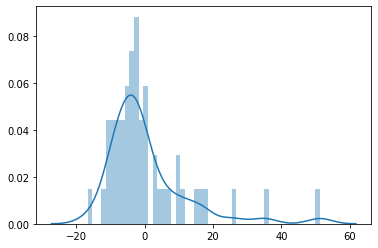

In [915]:
sns.distplot(predDF['Y Test'] - predDF['Model Predictions'], bins = 50)

In [916]:
# MAE, MSE, RMSE
print(mean_absolute_error(predDF['Y Test'],predDF['Model Predictions']))
print(mean_squared_error(predDF['Y Test'],predDF['Model Predictions']))
print(np.sqrt(mean_squared_error(predDF['Y Test'],predDF['Model Predictions'])))

8.095505889673564
145.9703036656809
12.081817068044066


In [917]:
# This is worse than the linear regression model. Adding dropout layers.
# first look at rmsprop with earlystopping/without dropout.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [918]:
earlyStop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=5)
model.fit(x = X_train, 
          y = y_train.values, 
          validation_data=(X_test, y_test.values),
          batch_size = 16, 
          epochs=500,
          verbose = 1,
          callbacks = [earlyStop])

Train on 114 samples, validate on 50 samples
Epoch 1/500
114/114 [==============================] - 0s 4ms/sample - loss: 582.2564 - val_loss: 488.0920
Epoch 2/500
114/114 [==============================] - 0s 132us/sample - loss: 581.4694 - val_loss: 487.5956
Epoch 3/500
114/114 [==============================] - 0s 131us/sample - loss: 581.2310 - val_loss: 487.2043
Epoch 4/500
114/114 [==============================] - 0s 126us/sample - loss: 580.7582 - val_loss: 486.8489
Epoch 5/500
114/114 [==============================] - 0s 145us/sample - loss: 580.4557 - val_loss: 486.3818
Epoch 6/500
114/114 [==============================] - 0s 139us/sample - loss: 579.7709 - val_loss: 485.9109
Epoch 7/500
114/114 [==============================] - 0s 135us/sample - loss: 579.4857 - val_loss: 485.4211
Epoch 8/500
114/114 [==============================] - 0s 132us/sample - loss: 579.0781 - val_loss: 484.8703
Epoch 9/500
114/114 [==============================] - 0s 149us/sample - loss: 578.27

114/114 [==============================] - 0s 143us/sample - loss: 401.6283 - val_loss: 222.1083
Epoch 150/500
114/114 [==============================] - 0s 138us/sample - loss: 359.8022 - val_loss: 221.5218
Epoch 151/500
114/114 [==============================] - 0s 148us/sample - loss: 309.8660 - val_loss: 220.0037
Epoch 152/500
114/114 [==============================] - 0s 147us/sample - loss: 341.4392 - val_loss: 219.7453
Epoch 153/500
114/114 [==============================] - 0s 150us/sample - loss: 337.2761 - val_loss: 219.8099
Epoch 154/500
114/114 [==============================] - 0s 146us/sample - loss: 343.8680 - val_loss: 218.7444
Epoch 155/500
114/114 [==============================] - 0s 152us/sample - loss: 390.2320 - val_loss: 218.8280
Epoch 156/500
114/114 [==============================] - 0s 152us/sample - loss: 358.9691 - val_loss: 218.8652
Epoch 157/500
114/114 [==============================] - 0s 166us/sample - loss: 369.3588 - val_loss: 218.3511
Epoch 158/500
1

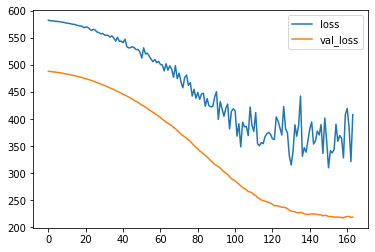

In [919]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

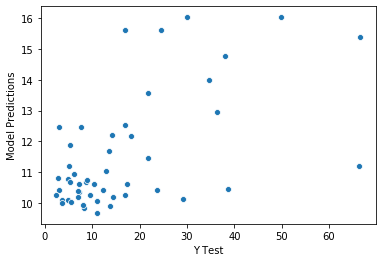

In [920]:
prediction = model.predict(X_test)
predDF = pd.DataFrame(y_test.values, columns=['Y Test'])
prediction = pd.Series(prediction.reshape(50,))
predDF = pd.concat([predDF, prediction], axis = 1)
predDF.columns = ['Y Test','Model Predictions']
sns.scatterplot(x='Y Test', y = 'Model Predictions', data = predDF)

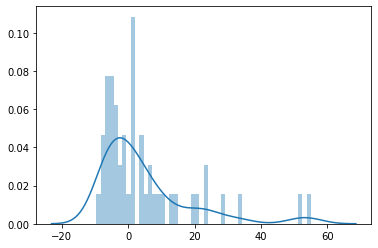

In [921]:
sns.distplot(predDF['Y Test'] - predDF['Model Predictions'], bins = 50)

In [922]:
# MAE, MSE, RMSE
print(mean_absolute_error(predDF['Y Test'],predDF['Model Predictions']))
print(mean_squared_error(predDF['Y Test'],predDF['Model Predictions']))
print(np.sqrt(mean_squared_error(predDF['Y Test'],predDF['Model Predictions'])))

9.254108199993237
218.76653127123936
14.790758306159944


In [923]:
# Nope this is way worse. We now try ANN with adams without dropouts.

In [924]:
model = Sequential()

model.add(Dense(3, activation = 'relu'))

model.add(Dense(3, activation = 'relu'))

model.add(Dense(3, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [925]:
earlyStop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=5)
model.fit(x = X_train, 
          y = y_train.values, 
          validation_data=(X_test, y_test.values),
          batch_size = 16, 
          epochs=500,
          verbose = 1,
          callbacks = [earlyStop])

Train on 114 samples, validate on 50 samples
Epoch 1/500
114/114 [==============================] - 0s 2ms/sample - loss: 582.0625 - val_loss: 487.8631
Epoch 2/500
114/114 [==============================] - 0s 131us/sample - loss: 581.2222 - val_loss: 487.0826
Epoch 3/500
114/114 [==============================] - 0s 129us/sample - loss: 580.5229 - val_loss: 486.3021
Epoch 4/500
114/114 [==============================] - 0s 142us/sample - loss: 579.7174 - val_loss: 485.4693
Epoch 5/500
114/114 [==============================] - 0s 132us/sample - loss: 578.9019 - val_loss: 484.5894
Epoch 6/500
114/114 [==============================] - 0s 128us/sample - loss: 578.0598 - val_loss: 483.7377
Epoch 7/500
114/114 [==============================] - 0s 137us/sample - loss: 577.2256 - val_loss: 482.7862
Epoch 8/500
114/114 [==============================] - 0s 140us/sample - loss: 576.2654 - val_loss: 481.8672
Epoch 9/500
114/114 [==============================] - 0s 127us/sample - loss: 575.37

114/114 [==============================] - 0s 135us/sample - loss: 265.2337 - val_loss: 168.7506
Epoch 150/500
114/114 [==============================] - 0s 137us/sample - loss: 265.1619 - val_loss: 168.6088
Epoch 151/500
114/114 [==============================] - 0s 145us/sample - loss: 265.1094 - val_loss: 168.4940
Epoch 152/500
114/114 [==============================] - 0s 138us/sample - loss: 264.9255 - val_loss: 168.3914
Epoch 153/500
114/114 [==============================] - 0s 138us/sample - loss: 264.8333 - val_loss: 168.2888
Epoch 154/500
114/114 [==============================] - 0s 142us/sample - loss: 264.7968 - val_loss: 168.2225
Epoch 155/500
114/114 [==============================] - 0s 144us/sample - loss: 264.6743 - val_loss: 168.1287
Epoch 156/500
114/114 [==============================] - 0s 144us/sample - loss: 264.6390 - val_loss: 168.0544
Epoch 157/500
114/114 [==============================] - 0s 143us/sample - loss: 264.5144 - val_loss: 167.9522
Epoch 158/500
1

Epoch 223/500
114/114 [==============================] - 0s 138us/sample - loss: 259.4850 - val_loss: 160.5801
Epoch 224/500
114/114 [==============================] - 0s 137us/sample - loss: 259.1846 - val_loss: 160.4531
Epoch 225/500
114/114 [==============================] - 0s 140us/sample - loss: 259.0782 - val_loss: 160.3467
Epoch 226/500
114/114 [==============================] - 0s 140us/sample - loss: 259.0475 - val_loss: 160.2606
Epoch 227/500
114/114 [==============================] - 0s 139us/sample - loss: 258.8566 - val_loss: 160.1732
Epoch 228/500
114/114 [==============================] - 0s 141us/sample - loss: 258.7785 - val_loss: 160.0760
Epoch 229/500
114/114 [==============================] - 0s 139us/sample - loss: 258.6196 - val_loss: 159.8928
Epoch 230/500
114/114 [==============================] - 0s 143us/sample - loss: 258.4762 - val_loss: 159.7350
Epoch 231/500
114/114 [==============================] - 0s 139us/sample - loss: 258.5616 - val_loss: 159.6105
E

Epoch 297/500
114/114 [==============================] - 0s 137us/sample - loss: 254.4072 - val_loss: 153.6165
Epoch 298/500
114/114 [==============================] - 0s 127us/sample - loss: 254.3158 - val_loss: 153.5641
Epoch 299/500
114/114 [==============================] - 0s 143us/sample - loss: 254.2754 - val_loss: 153.4724
Epoch 300/500
114/114 [==============================] - 0s 146us/sample - loss: 254.2305 - val_loss: 153.2896
Epoch 301/500
114/114 [==============================] - 0s 142us/sample - loss: 254.0621 - val_loss: 153.1496
Epoch 302/500
114/114 [==============================] - 0s 144us/sample - loss: 254.1046 - val_loss: 153.0394
Epoch 303/500
114/114 [==============================] - 0s 140us/sample - loss: 254.0765 - val_loss: 152.9708
Epoch 304/500
114/114 [==============================] - 0s 139us/sample - loss: 253.9693 - val_loss: 152.8930
Epoch 305/500
114/114 [==============================] - 0s 142us/sample - loss: 253.8907 - val_loss: 152.7930
E

Epoch 371/500
114/114 [==============================] - 0s 145us/sample - loss: 251.3272 - val_loss: 148.5913
Epoch 372/500
114/114 [==============================] - 0s 134us/sample - loss: 251.2673 - val_loss: 148.5361
Epoch 373/500
114/114 [==============================] - 0s 142us/sample - loss: 251.1800 - val_loss: 148.5106
Epoch 374/500
114/114 [==============================] - 0s 143us/sample - loss: 251.2008 - val_loss: 148.5087
Epoch 375/500
114/114 [==============================] - 0s 145us/sample - loss: 251.1520 - val_loss: 148.5028
Epoch 376/500
114/114 [==============================] - 0s 143us/sample - loss: 251.3121 - val_loss: 148.5449
Epoch 377/500
114/114 [==============================] - 0s 137us/sample - loss: 251.0581 - val_loss: 148.3583
Epoch 378/500
114/114 [==============================] - 0s 144us/sample - loss: 250.8466 - val_loss: 148.0478
Epoch 379/500
114/114 [==============================] - 0s 142us/sample - loss: 250.8388 - val_loss: 147.8279
E

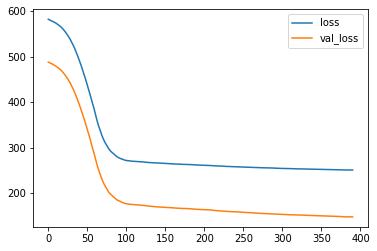

In [926]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

In [927]:
trainScore = model.evaluate(X_train, y_train, verbose = 0)
testScore = model.evaluate(X_test, y_test, verbose = 0)
trainScore, testScore

(250.6220478258635, 147.63592041015625)

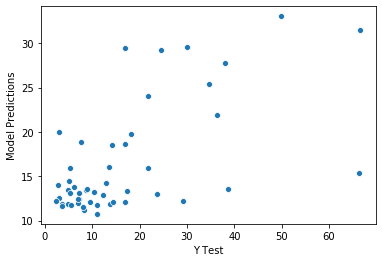

In [928]:
prediction = model.predict(X_test)
predDF = pd.DataFrame(y_test.values, columns=['Y Test'])
prediction = pd.Series(prediction.reshape(50,))
predDF = pd.concat([predDF, prediction], axis = 1)
predDF.columns = ['Y Test','Model Predictions']
sns.scatterplot(x='Y Test', y = 'Model Predictions', data = predDF)

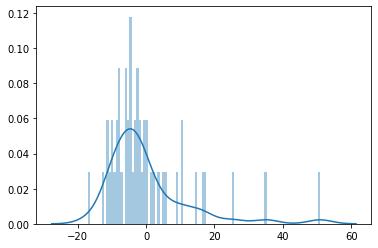

In [929]:
sns.distplot(predDF['Y Test'] - predDF['Model Predictions'], bins = 100)

In [930]:
# MAE, MSE, RMSE
print(mean_absolute_error(predDF['Y Test'],predDF['Model Predictions']))
print(mean_squared_error(predDF['Y Test'],predDF['Model Predictions']))
print(np.sqrt(mean_squared_error(predDF['Y Test'],predDF['Model Predictions'])))

8.340430187006328
147.63592288597087
12.150552369582662


In [933]:
# SO we see that the dataset is not quite useful to predict Sydney's airquality.
# Currently the linear regression model is the most accurate, but still with a 67% RMSE
# Let's try the same for Brisbane.
from sklearn.model_selection import train_test_split
X = v1[['Brisbane_distance', 'Brisbane_brightness', 'Brisbane_radiative']]
y = v1['Brisbane_PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [934]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

MAE: 28480.834030627684
MSE: 1857556504.5313206
RMSE: 43099.3793984475


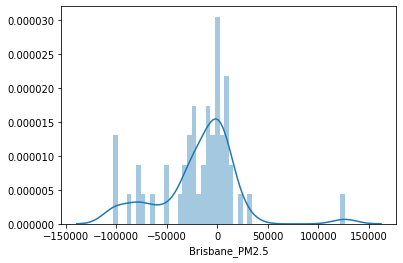

In [935]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
predictions = svr.predict(X_test)
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
sns.distplot(y_test - predictions, bins = 50)

In [936]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

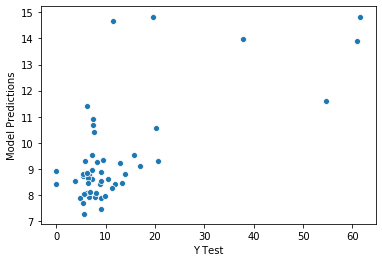

In [937]:
predDF = pd.DataFrame(y_test.values, columns=['Y Test'])
prediction = pd.Series(predictions.reshape(50,))
predDF = pd.concat([predDF, prediction], axis = 1)
predDF.columns = ['Y Test','Model Predictions']
sns.scatterplot(x='Y Test', y = 'Model Predictions', data = predDF)

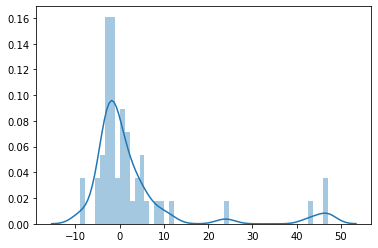

In [938]:
sns.distplot(predDF['Y Test'] - predDF['Model Predictions'], bins = 50)

In [939]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 6.160909918236875
MSE: 151.88966008025085
RMSE: 12.324352318894931


In [940]:
v1.describe()

Sydney_distance  Sydney_brightness  Sydney_radiative  \
count     1.640000e+02       1.640000e+02        164.000000   
mean      3.234160e+05       6.174310e+05      30308.958841   
std       4.625361e+05       3.896765e+05      33437.310413   
min       2.059984e+04       1.133697e+05       2537.141448   
25%       4.437130e+04       3.354608e+05      10232.075358   
50%       1.016892e+05       5.456670e+05      20625.881359   
75%       4.201127e+05       7.596404e+05      34204.140591   
max       2.358352e+06       2.304220e+06     236413.646454   

       Brisbane_distance  Brisbane_brightness  Brisbane_radiative  \
count       1.640000e+02         1.640000e+02          164.000000   
mean        2.194377e+05         6.290566e+05        33001.654294   
std         2.573482e+05         4.934066e+05        46511.268317   
min         2.053980e+04         9.198764e+04         2125.534323   
25%         5.584784e+04         3.071809e+05         9103.531891   
50%         1.047399e+05         5.062871e+05        18942.647403   
75%         3.014393e+05         7.637888e+05        34583.047971   
max         1.890824e+06         2.887091e+06       337642.023983   

       Adelaide_distance  Adelaide_brightness  Adelaide_radiative  Sydney_SO2  \
count         164.000000         1.640000e+02          164.000000  164.000000   
mean       101847.840028         6.902808e+05        31251.031724    0.057957   
std        128176.327839         5.235179e+05        39671.380264    0.060978   
min         12166.753206         1.242757e+05         2079.205822    0.000000   
25%         33349.161533         3.201932e+05         9687.997771    0.008902   
50%         52801.643571         5.220309e+05        21002.936454    0.033333   
75%        116083.790148         9.075636e+05        37798.735204    0.084615   
max        939495.078799         2.636714e+06       336184.947108    0.230769   

       Sydney_PM10  Sydney_PM2.5  Brisbane_CO  Brisbane_NO2  Brisbane_PM10  \
count   164.000000    164.000000   164.000000    164.000000     164.000000   
mean     32.536502     16.312122     0.067290      0.012125      26.546914   
std      26.178694     17.018426     0.085486      0.006176      22.876848   
min       5.871429      2.384766     0.000000      0.000000       0.000000   
25%      15.470313      6.065534     0.000000      0.007917      15.313542   
50%      22.092279      9.482215     0.027627      0.011383      20.777083   
75%      38.427665     17.970703     0.121875      0.015240      29.610417   
max     146.028571    102.557143     0.329167      0.030917     167.033333   

       Brisbane_PM2.5  Brisbane_temp  adelaide_PM10  adelaide_PM2.5  \
count      164.000000     164.000000     164.000000      164.000000   
mean        11.987992      -8.028930      19.328424        7.241371   
std         12.600308     135.348378      12.298444        6.229902   
min          0.000000    -817.945833       7.465217        2.412500   
25%          6.260417      19.246875      12.951875        4.535417   
50%          8.485417      22.434330      16.900000        5.752083   
75%         12.381250      25.436458      20.032292        7.512648   
max        100.825000      30.279167      88.333333       61.620833   

       adelaide_temp  
count     164.000000  
mean       17.231596  
std         6.151682  
min         7.829167  
25%        12.837500  
50%        15.704167  
75%        19.662500  
max        34.162500

Text(0, 0.5, 'predictions')

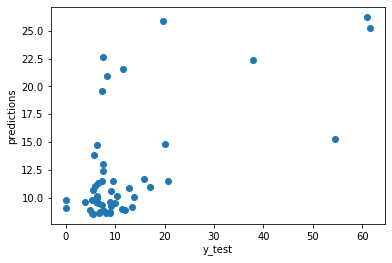

In [941]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

MAE: 6.694886835554526
MSE: 116.61032617857602
RMSE: 10.798626124585294


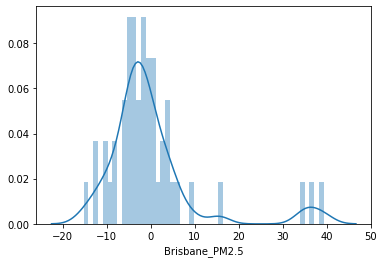

In [942]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
sns.distplot(y_test - predictions, bins = 50)

In [943]:
# It is still bad. Try ANN.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((114, 3), (50, 3))

In [955]:
# first look at rmsprop with earlystopping/without dropout.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(3, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(3, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [960]:
earlyStop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=10)
model.fit(x = X_train, 
          y = y_train.values, 
          validation_data=(X_test, y_test.values),
          batch_size = 16, 
          epochs=1000,
          verbose = 1,
          callbacks = [earlyStop])

Train on 114 samples, validate on 50 samples
Epoch 1/1000
114/114 [==============================] - 0s 157us/sample - loss: 172.2718 - val_loss: 205.5109
Epoch 2/1000
114/114 [==============================] - 0s 125us/sample - loss: 172.2413 - val_loss: 205.4811
Epoch 3/1000
114/114 [==============================] - 0s 116us/sample - loss: 172.2034 - val_loss: 205.4373
Epoch 4/1000
114/114 [==============================] - 0s 118us/sample - loss: 172.1569 - val_loss: 205.4328
Epoch 5/1000
114/114 [==============================] - 0s 120us/sample - loss: 172.0950 - val_loss: 205.1520
Epoch 6/1000
114/114 [==============================] - 0s 129us/sample - loss: 172.0426 - val_loss: 205.5789
Epoch 7/1000
114/114 [==============================] - 0s 149us/sample - loss: 171.9862 - val_loss: 204.9901
Epoch 8/1000
114/114 [==============================] - 0s 132us/sample - loss: 171.9199 - val_loss: 204.9277
Epoch 9/1000
114/114 [==============================] - 0s 129us/sample - l

114/114 [==============================] - 0s 146us/sample - loss: 164.8032 - val_loss: 197.2018
Epoch 148/1000
114/114 [==============================] - 0s 137us/sample - loss: 164.7687 - val_loss: 197.1716
Epoch 149/1000
114/114 [==============================] - 0s 142us/sample - loss: 164.7276 - val_loss: 197.1366
Epoch 150/1000
114/114 [==============================] - 0s 145us/sample - loss: 164.6765 - val_loss: 197.1124
Epoch 151/1000
114/114 [==============================] - 0s 144us/sample - loss: 164.6365 - val_loss: 197.0957
Epoch 152/1000
114/114 [==============================] - 0s 139us/sample - loss: 164.5886 - val_loss: 197.0688
Epoch 153/1000
114/114 [==============================] - 0s 128us/sample - loss: 164.5372 - val_loss: 197.0430
Epoch 154/1000
114/114 [==============================] - 0s 147us/sample - loss: 164.4915 - val_loss: 196.9979
Epoch 155/1000
114/114 [==============================] - 0s 139us/sample - loss: 164.4381 - val_loss: 196.9850
Epoch 1

114/114 [==============================] - 0s 168us/sample - loss: 159.0484 - val_loss: 190.9204
Epoch 294/1000
114/114 [==============================] - 0s 158us/sample - loss: 159.0236 - val_loss: 191.2610
Epoch 295/1000
114/114 [==============================] - 0s 156us/sample - loss: 158.9998 - val_loss: 190.7810
Epoch 296/1000
114/114 [==============================] - 0s 160us/sample - loss: 158.9609 - val_loss: 191.2489
Epoch 297/1000
114/114 [==============================] - 0s 161us/sample - loss: 158.9267 - val_loss: 190.7580
Epoch 298/1000
114/114 [==============================] - 0s 165us/sample - loss: 158.8957 - val_loss: 191.2196
Epoch 299/1000
114/114 [==============================] - 0s 156us/sample - loss: 158.8662 - val_loss: 190.7152
Epoch 300/1000
114/114 [==============================] - 0s 157us/sample - loss: 158.8264 - val_loss: 191.2824
Epoch 301/1000
114/114 [==============================] - 0s 164us/sample - loss: 158.7872 - val_loss: 191.1313
Epoch 3

114/114 [==============================] - 0s 98us/sample - loss: 155.3925 - val_loss: 187.2280
Epoch 440/1000
114/114 [==============================] - 0s 94us/sample - loss: 155.3843 - val_loss: 186.7617
Epoch 441/1000
114/114 [==============================] - 0s 94us/sample - loss: 155.3666 - val_loss: 187.2517
Epoch 442/1000
114/114 [==============================] - 0s 101us/sample - loss: 155.3508 - val_loss: 186.7105
Epoch 443/1000
114/114 [==============================] - 0s 105us/sample - loss: 155.3310 - val_loss: 187.1980
Epoch 444/1000
114/114 [==============================] - 0s 113us/sample - loss: 155.3026 - val_loss: 186.7580
Epoch 445/1000
114/114 [==============================] - 0s 119us/sample - loss: 155.2889 - val_loss: 187.1778
Epoch 446/1000
114/114 [==============================] - 0s 123us/sample - loss: 155.2702 - val_loss: 186.6678
Epoch 447/1000
114/114 [==============================] - 0s 135us/sample - loss: 155.2432 - val_loss: 187.1932
Epoch 448/

114/114 [==============================] - 0s 132us/sample - loss: 153.0285 - val_loss: 184.0538
Epoch 586/1000
114/114 [==============================] - 0s 142us/sample - loss: 153.0147 - val_loss: 184.0636
Epoch 587/1000
114/114 [==============================] - 0s 135us/sample - loss: 153.0047 - val_loss: 184.0721
Epoch 588/1000
114/114 [==============================] - 0s 134us/sample - loss: 152.9949 - val_loss: 184.0824
Epoch 589/1000
114/114 [==============================] - 0s 131us/sample - loss: 152.9793 - val_loss: 184.0880
Epoch 590/1000
114/114 [==============================] - 0s 128us/sample - loss: 152.9617 - val_loss: 184.0932
Epoch 591/1000
114/114 [==============================] - 0s 145us/sample - loss: 152.9492 - val_loss: 184.0910
Epoch 592/1000
114/114 [==============================] - 0s 134us/sample - loss: 152.9369 - val_loss: 184.0810
Epoch 593/1000
114/114 [==============================] - 0s 133us/sample - loss: 152.9323 - val_loss: 184.0770
Epoch 5

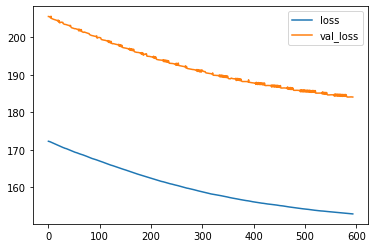

In [961]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

In [962]:
trainScore = model.evaluate(X_train, y_train, verbose = 0)
testScore = model.evaluate(X_test, y_test, verbose = 0)
trainScore, testScore

(152.9115852222108, 184.05480895996095)

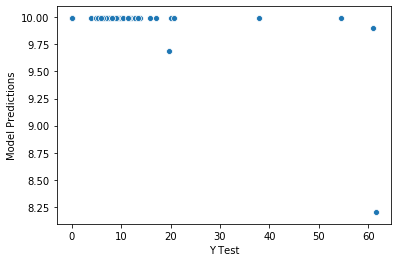

In [963]:
prediction = model.predict(X_test)
predDF = pd.DataFrame(y_test.values, columns=['Y Test'])
prediction = pd.Series(prediction.reshape(50,))
predDF = pd.concat([predDF, prediction], axis = 1)
predDF.columns = ['Y Test','Model Predictions']
sns.scatterplot(x='Y Test', y = 'Model Predictions', data = predDF)

In [964]:
# MAE, MSE, RMSE
print(mean_absolute_error(predDF['Y Test'],predDF['Model Predictions']))
print(mean_squared_error(predDF['Y Test'],predDF['Model Predictions']))
print(np.sqrt(mean_squared_error(predDF['Y Test'],predDF['Model Predictions'])))

6.974968737118486
184.05479994736726
13.566679768733662


In [968]:
# This is worse than the linear regression model. Adding dropout layers.
# first look at rmsprop with earlystopping/without dropout.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(3, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse')

In [969]:
earlyStop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=5)
model.fit(x = X_train, 
          y = y_train.values, 
          validation_data=(X_test, y_test.values),
          batch_size = 16, 
          epochs=500,
          verbose = 1,
          callbacks = [earlyStop])

Train on 114 samples, validate on 50 samples
Epoch 1/500
114/114 [==============================] - 0s 4ms/sample - loss: 293.0758 - val_loss: 330.1212
Epoch 2/500
114/114 [==============================] - 0s 160us/sample - loss: 290.4803 - val_loss: 329.1184
Epoch 3/500
114/114 [==============================] - 0s 132us/sample - loss: 291.8744 - val_loss: 328.0365
Epoch 4/500
114/114 [==============================] - 0s 132us/sample - loss: 291.2554 - val_loss: 327.2643
Epoch 5/500
114/114 [==============================] - 0s 130us/sample - loss: 290.1172 - val_loss: 326.4990
Epoch 6/500
114/114 [==============================] - 0s 151us/sample - loss: 288.1747 - val_loss: 325.7760
Epoch 7/500
114/114 [==============================] - 0s 134us/sample - loss: 287.7333 - val_loss: 325.0853
Epoch 8/500
114/114 [==============================] - 0s 138us/sample - loss: 288.5192 - val_loss: 324.4108
Epoch 9/500
114/114 [==============================] - 0s 132us/sample - loss: 289.27

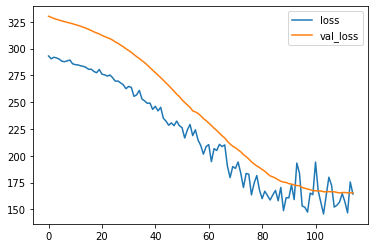

In [970]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

In [971]:
# This is not successful.
# Try Adams
model = Sequential()

model.add(Dense(3, activation = 'relu'))

model.add(Dense(3, activation = 'relu'))

model.add(Dense(3, activation = 'relu'))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [972]:
earlyStop = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience=5)
model.fit(x = X_train, 
          y = y_train.values, 
          validation_data=(X_test, y_test.values),
          batch_size = 16, 
          epochs=500,
          verbose = 1,
          callbacks = [earlyStop])

Train on 114 samples, validate on 50 samples
Epoch 1/500
114/114 [==============================] - 0s 3ms/sample - loss: 302.7422 - val_loss: 340.6679
Epoch 2/500
114/114 [==============================] - 0s 124us/sample - loss: 301.3026 - val_loss: 339.2072
Epoch 3/500
114/114 [==============================] - 0s 119us/sample - loss: 300.0094 - val_loss: 337.8192
Epoch 4/500
114/114 [==============================] - 0s 115us/sample - loss: 298.6997 - val_loss: 336.4952
Epoch 5/500
114/114 [==============================] - 0s 123us/sample - loss: 297.5314 - val_loss: 335.2753
Epoch 6/500
114/114 [==============================] - 0s 144us/sample - loss: 296.4531 - val_loss: 334.2559
Epoch 7/500
114/114 [==============================] - 0s 133us/sample - loss: 295.5648 - val_loss: 333.2979
Epoch 8/500
114/114 [==============================] - 0s 126us/sample - loss: 294.7100 - val_loss: 332.4498
Epoch 9/500
114/114 [==============================] - 0s 124us/sample - loss: 293.92

114/114 [==============================] - 0s 134us/sample - loss: 142.1065 - val_loss: 158.6981
Epoch 150/500
114/114 [==============================] - 0s 135us/sample - loss: 142.0283 - val_loss: 158.6322
Epoch 151/500
114/114 [==============================] - 0s 136us/sample - loss: 141.9994 - val_loss: 158.4980
Epoch 152/500
114/114 [==============================] - 0s 136us/sample - loss: 141.9004 - val_loss: 158.3436
Epoch 153/500
114/114 [==============================] - 0s 135us/sample - loss: 141.8379 - val_loss: 158.1202
Epoch 154/500
114/114 [==============================] - 0s 132us/sample - loss: 141.7928 - val_loss: 157.9462
Epoch 155/500
114/114 [==============================] - 0s 134us/sample - loss: 141.6739 - val_loss: 157.8652
Epoch 156/500
114/114 [==============================] - 0s 130us/sample - loss: 141.6416 - val_loss: 157.7893
Epoch 157/500
114/114 [==============================] - 0s 143us/sample - loss: 141.5585 - val_loss: 157.6408
Epoch 158/500
1

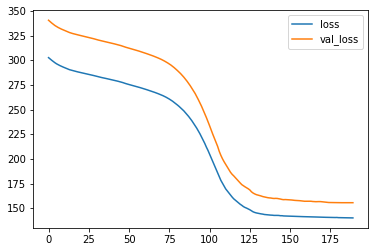

In [973]:
modelLoss = pd.DataFrame(model.history.history)
modelLoss.plot()

In [974]:
trainScore = model.evaluate(X_train, y_train, verbose = 0)
testScore = model.evaluate(X_test, y_test, verbose = 0)
trainScore, testScore

(140.13860120271383, 155.6002980041504)

In [975]:
# MAE, MSE, RMSE
print(mean_absolute_error(predDF['Y Test'],predDF['Model Predictions']))
print(mean_squared_error(predDF['Y Test'],predDF['Model Predictions']))
print(np.sqrt(mean_squared_error(predDF['Y Test'],predDF['Model Predictions'])))

6.974968737118486
184.05479994736726
13.566679768733662


In [976]:
# The best model for Brisbane is still the linear model, which has RMSE = 10.798626,  which is 90%!

In [977]:
# Now we try to apply linear model on Adelaide dataset.
from sklearn.model_selection import train_test_split
X = v1[['Adelaide_distance', 'Adelaide_brightness', 'Adelaide_radiative']]
y = v1['adelaide_PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

Text(0, 0.5, 'predictions')

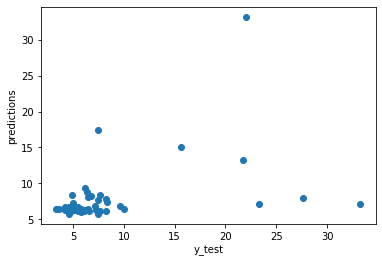

In [978]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

MAE: 3.0784631043165267
MSE: 35.208431253743655
RMSE: 5.933669290897805


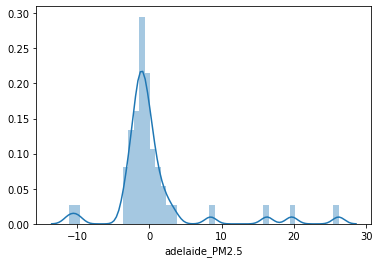

In [979]:
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
sns.distplot(y_test - predictions, bins = 50)

In [980]:
# Note that Adelaide's PM2.5 has mean of 7.241371 and the RMSE of the linear model is 5.93366, which is approx. 82%.

In [981]:
# Now we see that the factors are difficult to predict the quantity of pollutants/gases using regression/ANN.
# In the following, we attempt to categorize the pollutant levels, then try to use the factors to classify. 

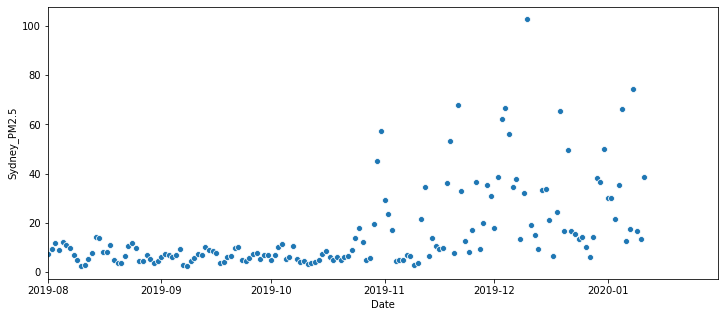

In [986]:
plt.figure(figsize=(12, 5))
plt.xlim(datetime.strptime('2019/08/01', '%Y/%m/%d'), datetime.strptime('2020/01/31', '%Y/%m/%d'))
sns.scatterplot(x = 'Date', y = 'Sydney_PM2.5', data = v1)

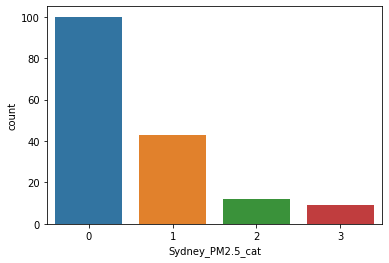

In [995]:
def categorize2_5(num):
    if num < 12:
        return 0
    elif num < 35.4:
        return 1
    elif num < 55.4:
        return 2
    else:
        return 3
v1['Sydney_PM2.5_cat'] = v1['Sydney_PM2.5'].apply(categorize2_5)
sns.countplot(x = 'Sydney_PM2.5_cat', data = v1)

In [991]:
v1.head()

Date  Sydney_distance  Sydney_brightness  Sydney_radiative  \
0 2019-10-01     48132.217518       6.513303e+05      31160.329856   
1 2019-10-02     34920.106989       4.241556e+05      20013.305255   
2 2019-10-03     46292.148306       5.225388e+05      23282.740197   
3 2019-10-04     67785.645511       9.093577e+05      42935.863699   
4 2019-10-05     58335.517576       1.005179e+06      46732.351663   

   Brisbane_distance  Brisbane_brightness  Brisbane_radiative  \
0       50004.699088        582455.394517        27907.089793   
1       39998.384469        384602.865734        18208.083430   
2       56293.854629        460523.746009        21008.112150   
3       91171.229834        864639.529573        42358.763405   
4       65815.598598        973539.929432        46213.434814   

   Adelaide_distance  Adelaide_brightness  Adelaide_radiative  ...  \
0       49402.094214        540496.128100        25305.596101  ...   
1       33498.837313        353272.307608        15981.195746  ...   
2       38570.907479        458876.418802        19176.752295  ...   
3       79442.356901        654728.526048        27974.670133  ...   
4       89684.036557        671146.869782        29301.897205  ...   

   Sydney_PM2.5  Brisbane_CO  Brisbane_NO2  Brisbane_PM10  Brisbane_PM2.5  \
0      4.941602     0.058333      0.014083      16.679167        6.354167   
1      7.170854     0.095833      0.014708      15.750000        5.600000   
2     10.342019     0.100000      0.015792      14.079167        4.904167   
3     11.456855     0.025000      0.011000      11.629167        4.137500   
4      5.200339     0.008333      0.006958      22.329167        9.004167   

   Brisbane_temp  adelaide_PM10  adelaide_PM2.5  adelaide_temp  \
0      19.654167      12.108333        4.291667      21.591667   
1      19.033333      24.037500        7.708696      21.558333   
2      20.066667      24.445833        8.437500      15.908333   
3      20.916667      26.216667        8.204167      22.112500   
4      22.175000      32.745833        9.626087      25.462500   

   Sydney_PM2.5_cat  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  

[5 rows x 22 columns]

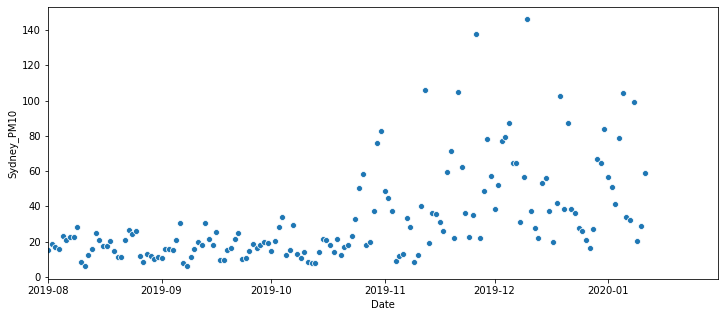

In [992]:
plt.figure(figsize=(12, 5))
plt.xlim(datetime.strptime('2019/08/01', '%Y/%m/%d'), datetime.strptime('2020/01/31', '%Y/%m/%d'))
sns.scatterplot(x = 'Date', y = 'Sydney_PM10', data = v1)

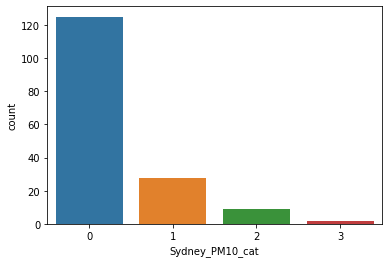

In [996]:
def categorize10(num):
    if num < 40:
        return 0
    elif num < 80:
        return 1
    elif num < 120:
        return 2
    else:
        return 3
v1['Sydney_PM10_cat'] = v1['Sydney_PM10'].apply(categorize10)
sns.countplot(x = 'Sydney_PM10_cat', data = v1)

In [997]:
v1['Brisbane_PM2.5_cat'] = v1['Brisbane_PM2.5'].apply(categorize2_5)
v1['Brisbane_PM10_cat'] = v1['Brisbane_PM10'].apply(categorize10)
v1['Adelaide_PM2.5_cat'] = v1['adelaide_PM2.5'].apply(categorize2_5)
v1['Adelaide_PM10_cat'] = v1['adelaide_PM10'].apply(categorize10)

In [999]:
v1

Date  Sydney_distance  Sydney_brightness  Sydney_radiative  \
0   2019-10-01     48132.217518       6.513303e+05      31160.329856   
1   2019-10-02     34920.106989       4.241556e+05      20013.305255   
2   2019-10-03     46292.148306       5.225388e+05      23282.740197   
3   2019-10-04     67785.645511       9.093577e+05      42935.863699   
4   2019-10-05     58335.517576       1.005179e+06      46732.351663   
..         ...              ...                ...               ...   
159 2019-09-26     26858.558935       1.512004e+05       4783.768075   
160 2019-09-27     56791.552319       2.591585e+05       7187.394586   
161 2019-09-28     43090.213610       3.028718e+05      11025.078841   
162 2019-09-29     48663.241087       4.351157e+05      16588.983460   
163 2019-09-30     36164.288636       4.379598e+05      19057.481534   

     Brisbane_distance  Brisbane_brightness  Brisbane_radiative  \
0         50004.699088        582455.394517        27907.089793   
1         39998.384469        384602.865734        18208.083430   
2         56293.854629        460523.746009        21008.112150   
3         91171.229834        864639.529573        42358.763405   
4         65815.598598        973539.929432        46213.434814   
..                 ...                  ...                 ...   
159       28669.467715        136192.914662         4337.208563   
160       73122.767196        229692.406721         6630.666181   
161       58147.888982        265356.462687         9639.630005   
162       90783.930092        383079.686918        14710.058702   
163       44609.232521        388099.357456        17509.714822   

     Adelaide_distance  Adelaide_brightness  Adelaide_radiative  ...  \
0         49402.094214        540496.128100        25305.596101  ...   
1         33498.837313        353272.307608        15981.195746  ...   
2         38570.907479        458876.418802        19176.752295  ...   
3         79442.356901        654728.526048        27974.670133  ...   
4         89684.036557        671146.869782        29301.897205  ...   
..                 ...                  ...                 ...  ...   
159       16980.972692        146316.272633         4028.768585  ...   
160       27147.408445        271625.245174         6885.308489  ...   
161       27120.738570        294337.895210        10739.900471  ...   
162       34212.217377        401170.538834        14523.362091  ...   
163       42014.059708        374877.120478        14795.486911  ...   

     Brisbane_temp  adelaide_PM10  adelaide_PM2.5  adelaide_temp  \
0        19.654167      12.108333        4.291667      21.591667   
1        19.033333      24.037500        7.708696      21.558333   
2        20.066667      24.445833        8.437500      15.908333   
3        20.916667      26.216667        8.204167      22.112500   
4        22.175000      32.745833        9.626087      25.462500   
..             ...            ...             ...            ...   
159      21.075000       9.121739        4.056522      18.441667   
160      22.504167      15.829167        5.269565      15.466667   
161      22.825000      18.200000        6.141667      12.054167   
162      21.612500      14.508333        5.556522      12.791667   
163      22.447826       9.525000        3.359091      15.166667   

     Sydney_PM2.5_cat  Sydney_PM10_cat  Brisbane_PM2.5_cat  Brisbane_PM10_cat  \
0                   0                0                   0                  0   
1                   0                0                   0                  0   
2                   0                0                   0                  0   
3                   0                0                   0                  0   
4                   0                0                   0                  0   
..                ...              ...                 ...                ...   
159                 0                0                   0                  0   
160       

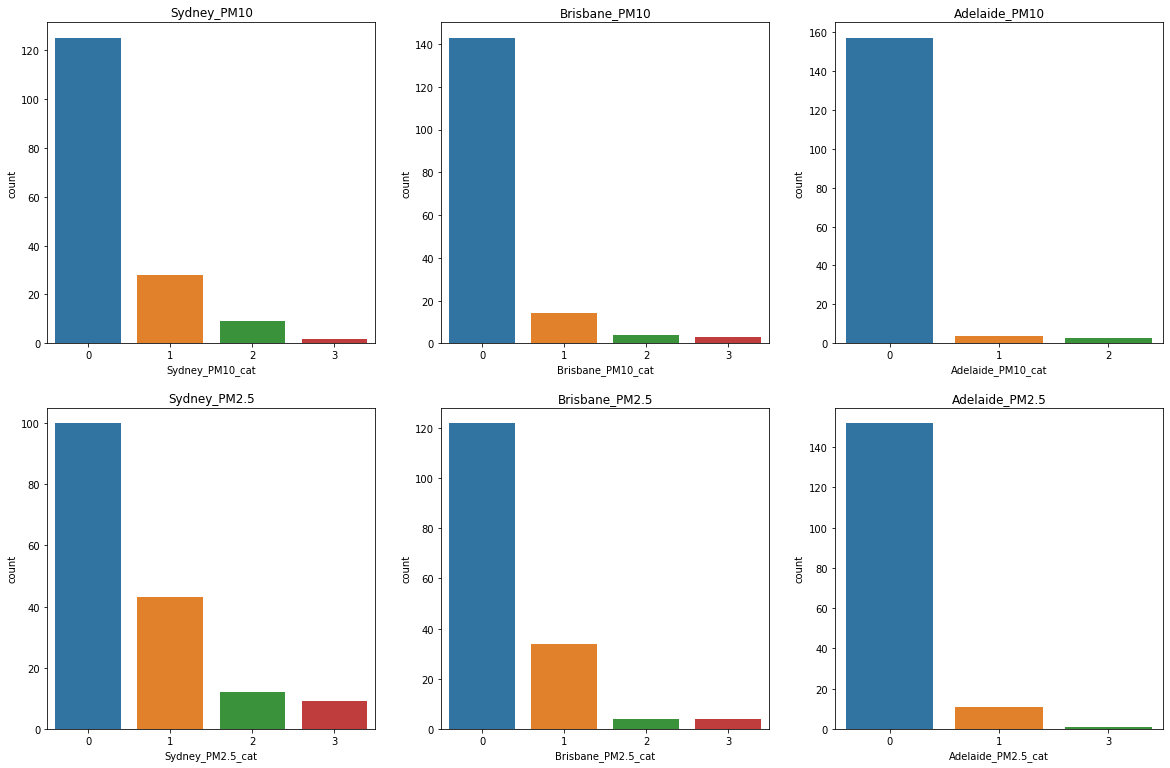

In [1006]:
fig, axes = plt.subplots(2, 3, figsize=(20, 13))
plt.xlim(datetime.strptime('2019/08/01', '%Y/%m/%d'), datetime.strptime('2020/01/31', '%Y/%m/%d'))
sns.countplot(x = 'Sydney_PM10_cat', data = v1, ax=axes[0, 0])
sns.countplot(x = 'Brisbane_PM10_cat', data = v1, ax=axes[0, 1])
sns.countplot(x = 'Adelaide_PM10_cat', data = v1, ax=axes[0, 2])
sns.countplot(x = 'Sydney_PM2.5_cat', data = v1, ax=axes[1, 0])
sns.countplot(x = 'Brisbane_PM2.5_cat', data = v1, ax=axes[1, 1])
sns.countplot(x = 'Adelaide_PM2.5_cat', data = v1, ax=axes[1, 2])
axes[0, 0].set_title('Sydney_PM10')
axes[0, 1].set_title('Brisbane_PM10')
axes[0, 2].set_title('Adelaide_PM10')
axes[1, 0].set_title('Sydney_PM2.5')
axes[1, 1].set_title('Brisbane_PM2.5')
axes[1, 2].set_title('Adelaide_PM2.5')
plt.show()

In [1008]:
v1.head()

Date  Sydney_distance  Sydney_brightness  Sydney_radiative  \
0 2019-10-01     48132.217518       6.513303e+05      31160.329856   
1 2019-10-02     34920.106989       4.241556e+05      20013.305255   
2 2019-10-03     46292.148306       5.225388e+05      23282.740197   
3 2019-10-04     67785.645511       9.093577e+05      42935.863699   
4 2019-10-05     58335.517576       1.005179e+06      46732.351663   

   Brisbane_distance  Brisbane_brightness  Brisbane_radiative  \
0       50004.699088        582455.394517        27907.089793   
1       39998.384469        384602.865734        18208.083430   
2       56293.854629        460523.746009        21008.112150   
3       91171.229834        864639.529573        42358.763405   
4       65815.598598        973539.929432        46213.434814   

   Adelaide_distance  Adelaide_brightness  Adelaide_radiative  ...  \
0       49402.094214        540496.128100        25305.596101  ...   
1       33498.837313        353272.307608        15981.195746  ...   
2       38570.907479        458876.418802        19176.752295  ...   
3       79442.356901        654728.526048        27974.670133  ...   
4       89684.036557        671146.869782        29301.897205  ...   

   Brisbane_temp  adelaide_PM10  adelaide_PM2.5  adelaide_temp  \
0      19.654167      12.108333        4.291667      21.591667   
1      19.033333      24.037500        7.708696      21.558333   
2      20.066667      24.445833        8.437500      15.908333   
3      20.916667      26.216667        8.204167      22.112500   
4      22.175000      32.745833        9.626087      25.462500   

   Sydney_PM2.5_cat  Sydney_PM10_cat  Brisbane_PM2.5_cat  Brisbane_PM10_cat  \
0                 0                0                   0                  0   
1                 0                0                   0                  0   
2                 0                0                   0                  0   
3                 0                0                   0                  0   
4                 0                0                   0                  0   

   Adelaide_PM2.5_cat  Adelaide_PM10_cat  
0                   0                  0  
1                   0                  0  
2                   0                  0  
3                   0                  0  
4                   0                  0  

[5 rows x 27 columns]

### KNN

In [1013]:
from sklearn.model_selection import train_test_split
X = v1[['Sydney_distance', 'Sydney_brightness', 'Sydney_radiative']]
y = v1['Sydney_PM2.5_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [1014]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [1015]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[25  1  0  0]
 [13  4  1  0]
 [ 3  1  0  0]
 [ 2  0  0  0]]
              precision    recall  f1-score   support

           0       0.58      0.96      0.72        26
           1       0.67      0.22      0.33        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.58        50
   macro avg       0.31      0.30      0.26        50
weighted avg       0.54      0.58      0.50        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1022]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

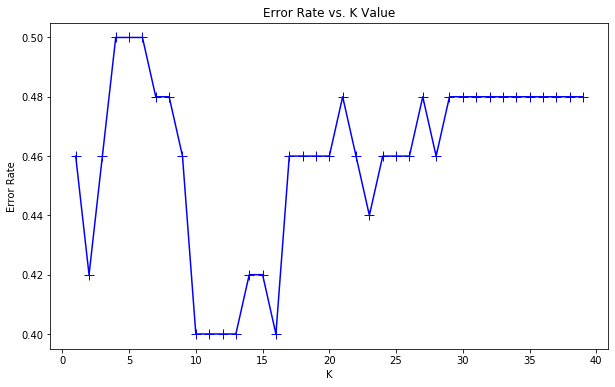

In [1024]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [1026]:
# So let us try k = 12.
X = v1[['Sydney_distance', 'Sydney_brightness', 'Sydney_radiative']]
y = v1['Sydney_PM2.5_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [1027]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[26  0  0  0]
 [14  4  0  0]
 [ 3  1  0  0]
 [ 2  0  0  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.80      0.22      0.35        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.60        50
   macro avg       0.34      0.31      0.27        50
weighted avg       0.59      0.60      0.51        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [1028]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [1030]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[25  1  0  0]
 [15  2  1  0]
 [ 2  2  0  0]
 [ 1  0  0  1]]
              precision    recall  f1-score   support

           0       0.58      0.96      0.72        26
           1       0.40      0.11      0.17        18
           2       0.00      0.00      0.00         4
           3       1.00      0.50      0.67         2

    accuracy                           0.56        50
   macro avg       0.50      0.39      0.39        50
weighted avg       0.49      0.56      0.47        50



### Decision Tree

In [1031]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [1032]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[24  1  0  1]
 [11  4  1  2]
 [ 2  1  1  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.63      0.92      0.75        26
           1       0.57      0.22      0.32        18
           2       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         2

    accuracy                           0.58        50
   macro avg       0.43      0.35      0.35        50
weighted avg       0.57      0.58      0.53        50



### Random Forest

In [1033]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1034]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[25  1  0  0]
 [12  4  0  2]
 [ 1  3  0  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77        26
           1       0.44      0.22      0.30        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.58        50
   macro avg       0.27      0.30      0.27        50
weighted avg       0.49      0.58      0.51        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1035]:
# We now gridsearch on the number of trees in the forest.
error_rate = []

for i in range(50,150):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    error_rate.append(np.mean(rfc_pred != y_test))

Text(0, 0.5, 'Error Rate')

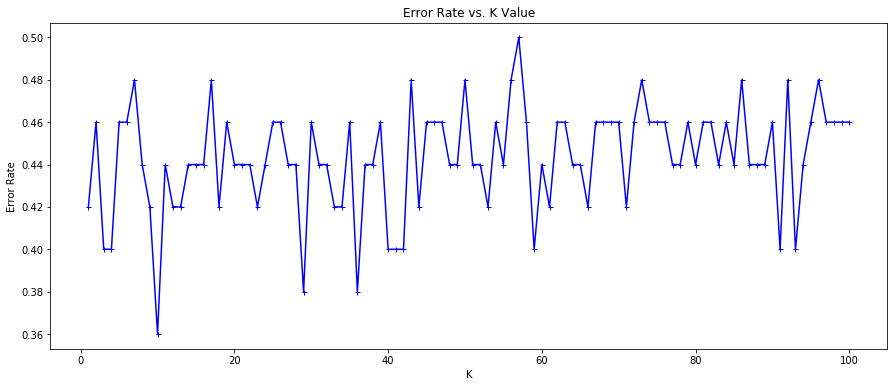

In [1039]:
plt.figure(figsize=(15,6))
plt.plot(range(1,101),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [1048]:
# optimal value occurs at 10.
rfc = RandomForestClassifier(n_estimators=63)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[25  1  0  0]
 [12  5  0  1]
 [ 2  2  0  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.62      0.96      0.76        26
           1       0.56      0.28      0.37        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.60        50
   macro avg       0.30      0.31      0.28        50
weighted avg       0.53      0.60      0.53        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVC

In [1049]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [1050]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[26  0  0  0]
 [15  3  0  0]
 [ 3  1  0  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.60      0.17      0.26        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.58        50
   macro avg       0.29      0.29      0.25        50
weighted avg       0.52      0.58      0.47        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1051]:
# grid search
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.636, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.636, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.652, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.652, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.652, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.652, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.636, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [1052]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [1053]:
grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [1054]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[26  0  0  0]
 [15  3  0  0]
 [ 3  1  0  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.60      0.17      0.26        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.58        50
   macro avg       0.29      0.29      0.25        50
weighted avg       0.52      0.58      0.47        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now, we summarize the prediction performance of various methods for Sydney's PM2.5 level:
 - KNN: 0.73, 0.35, 0.60
 - Logistic Regression: 0.72, 0.17, 0.56
 - Decision Tree: 0.75, 0.32, 0.33, 0.58
 - Random Forest: 0.76, 0.37, 0.60
 - SVC: 0.73, 0.26, 0.58
So together, we can conclude that the Random forest model performs the best for Sydney's PM2.5 level.

### In the following, we try to predict Brisbane's PM2.5 level using the above procedure.

### KNN

In [1055]:
from sklearn.model_selection import train_test_split
X = v1[['Brisbane_distance', 'Brisbane_brightness', 'Brisbane_radiative']]
y = v1['Brisbane_PM2.5_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [1056]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [1057]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[37  1  0  0]
 [ 7  1  0  0]
 [ 1  1  0  0]
 [ 0  1  0  1]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.25      0.12      0.17         8
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2

    accuracy                           0.78        50
   macro avg       0.52      0.40      0.43        50
weighted avg       0.70      0.78      0.73        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1058]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

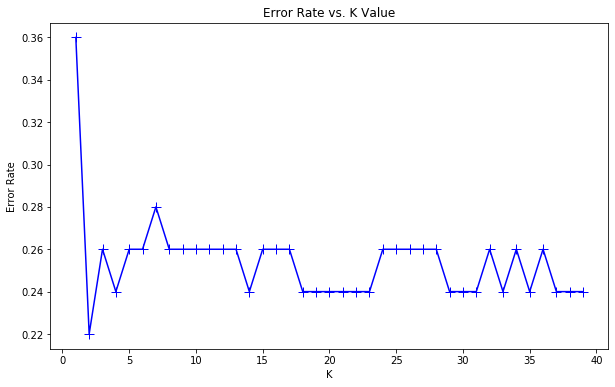

In [1059]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [1060]:
# So let us try k = 2.
X = v1[['Brisbane_distance', 'Brisbane_brightness', 'Brisbane_radiative']]
y = v1['Brisbane_PM2.5_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [1061]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[37  1  0  0]
 [ 7  1  0  0]
 [ 1  1  0  0]
 [ 0  1  0  1]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.25      0.12      0.17         8
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2

    accuracy                           0.78        50
   macro avg       0.52      0.40      0.43        50
weighted avg       0.70      0.78      0.73        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [1062]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [1063]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[36  2  0  0]
 [ 7  1  0  0]
 [ 2  0  0  0]
 [ 0  2  0  0]]
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        38
           1       0.20      0.12      0.15         8
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.74        50
   macro avg       0.25      0.27      0.26        50
weighted avg       0.64      0.74      0.68        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [1064]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [1065]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[30  4  2  2]
 [ 6  2  0  0]
 [ 1  1  0  0]
 [ 0  1  1  0]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        38
           1       0.25      0.25      0.25         8
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.64        50
   macro avg       0.27      0.26      0.26        50
weighted avg       0.66      0.64      0.65        50



### Random Forest

In [1066]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1067]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[37  1  0  0]
 [ 7  1  0  0]
 [ 1  1  0  0]
 [ 1  0  0  1]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        38
           1       0.33      0.12      0.18         8
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2

    accuracy                           0.78        50
   macro avg       0.53      0.40      0.43        50
weighted avg       0.70      0.78      0.73        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1068]:
# We now gridsearch on the number of trees in the forest.
error_rate = []

for i in range(50,150):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    error_rate.append(np.mean(rfc_pred != y_test))

Text(0, 0.5, 'Error Rate')

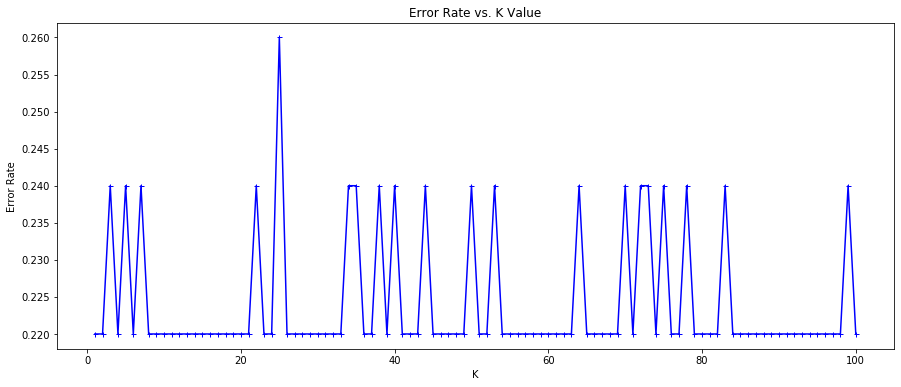

In [1069]:
plt.figure(figsize=(15,6))
plt.plot(range(1,101),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [1070]:
# optimal value occurs at 10.
rfc = RandomForestClassifier(n_estimators=63)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[37  1  0  0]
 [ 7  1  0  0]
 [ 1  1  0  0]
 [ 1  0  0  1]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        38
           1       0.33      0.12      0.18         8
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2

    accuracy                           0.78        50
   macro avg       0.53      0.40      0.43        50
weighted avg       0.70      0.78      0.73        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVC

In [1071]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [1072]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[37  1  0  0]
 [ 7  1  0  0]
 [ 1  1  0  0]
 [ 0  2  0  0]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.20      0.12      0.15         8
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.76        50
   macro avg       0.26      0.27      0.26        50
weighted avg       0.66      0.76      0.70        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1073]:
# grid search
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.727, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.727, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.727, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.739, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [1074]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [1075]:
grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [1076]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[37  1  0  0]
 [ 7  1  0  0]
 [ 1  1  0  0]
 [ 0  2  0  0]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        38
           1       0.20      0.12      0.15         8
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2

    accuracy                           0.76        50
   macro avg       0.26      0.27      0.26        50
weighted avg       0.66      0.76      0.70        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now, we summarize the prediction performance of various methods for Brisbane's PM2.5 level:
- KNN: 0.89, 0.17, 0.67, 0.78
- Logistic Regression: 0.87, 0.15, 0.00, 0.74
- Decision Tree: 0.80, 0.25, 0.00, 0.64
- Random Forest: 0.88, 0.18, 0.67, 0.78
- SVC: 0.89, 0.15, 0.00, 0.76
After comparison, we accept that Random Forest as the best model

### In the following, we try to predcit Adelaide's PM2.5 Level using this procedure.

# KNN

In [1079]:
from sklearn.model_selection import train_test_split
X = v1[['Adelaide_distance', 'Adelaide_brightness', 'Adelaide_radiative']]
y = v1['Adelaide_PM2.5_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [1080]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [1081]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[44  0]
 [ 6  0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        44
           1       0.00      0.00      0.00         6

    accuracy                           0.88        50
   macro avg       0.44      0.50      0.47        50
weighted avg       0.77      0.88      0.82        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1082]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

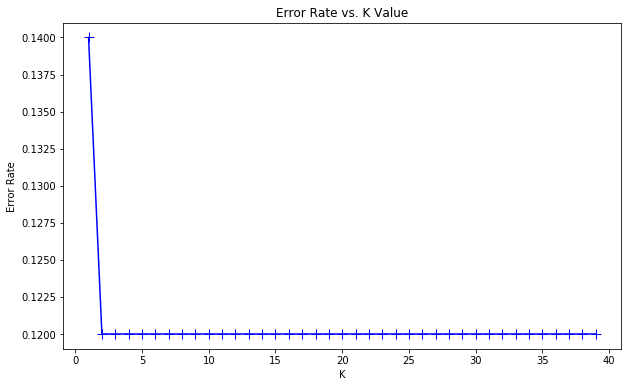

In [1083]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [1084]:
# So let us try k = 30.
X = v1[['Sydney_distance', 'Sydney_brightness', 'Sydney_radiative']]
y = v1['Sydney_PM2.5_cat']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [1085]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[26  0  0  0]
 [18  0  0  0]
 [ 3  1  0  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        26
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.52        50
   macro avg       0.14      0.25      0.18        50
weighted avg       0.28      0.52      0.37        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [1086]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [1087]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[25  1  0  0]
 [15  2  1  0]
 [ 2  2  0  0]
 [ 1  0  0  1]]
              precision    recall  f1-score   support

           0       0.58      0.96      0.72        26
           1       0.40      0.11      0.17        18
           2       0.00      0.00      0.00         4
           3       1.00      0.50      0.67         2

    accuracy                           0.56        50
   macro avg       0.50      0.39      0.39        50
weighted avg       0.49      0.56      0.47        50



### Decision Tree 

In [1088]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [1089]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[24  1  0  1]
 [ 9  6  1  2]
 [ 2  1  1  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.67      0.92      0.77        26
           1       0.67      0.33      0.44        18
           2       0.50      0.25      0.33         4
           3       0.00      0.00      0.00         2

    accuracy                           0.62        50
   macro avg       0.46      0.38      0.39        50
weighted avg       0.63      0.62      0.59        50



### Random Forest

In [1090]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1091]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[25  1  0  0]
 [14  1  1  2]
 [ 2  2  0  0]
 [ 0  1  0  1]]
              precision    recall  f1-score   support

           0       0.61      0.96      0.75        26
           1       0.20      0.06      0.09        18
           2       0.00      0.00      0.00         4
           3       0.33      0.50      0.40         2

    accuracy                           0.54        50
   macro avg       0.29      0.38      0.31        50
weighted avg       0.40      0.54      0.44        50



In [1092]:
# We now gridsearch on the number of trees in the forest.
error_rate = []

for i in range(50,150):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    error_rate.append(np.mean(rfc_pred != y_test))

Text(0, 0.5, 'Error Rate')

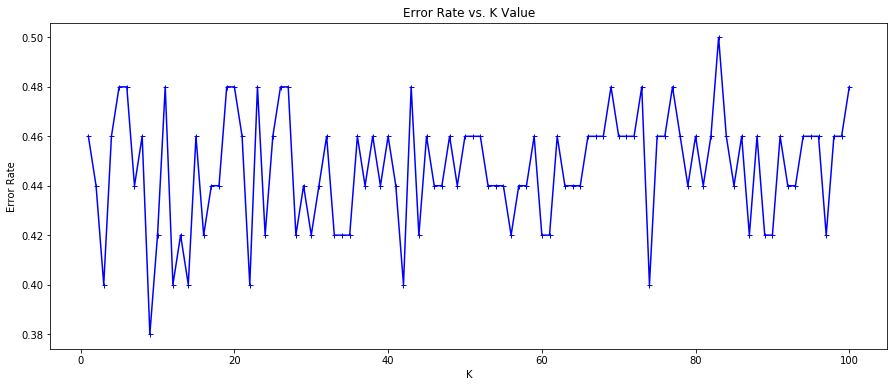

In [1093]:
plt.figure(figsize=(15,6))
plt.plot(range(1,101),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [1097]:
# optimal value occurs at 9.
rfc = RandomForestClassifier(n_estimators=60)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[25  1  0  0]
 [10  5  2  1]
 [ 1  3  0  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.68      0.96      0.79        26
           1       0.50      0.28      0.36        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.60        50
   macro avg       0.29      0.31      0.29        50
weighted avg       0.53      0.60      0.54        50



### SVC

In [1098]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [1099]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[26  0  0  0]
 [15  3  0  0]
 [ 3  1  0  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.60      0.17      0.26        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.58        50
   macro avg       0.29      0.29      0.25        50
weighted avg       0.52      0.58      0.47        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1100]:
# grid search
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.636, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.636, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.652, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [1101]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [1102]:
grid.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [1103]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[26  0  0  0]
 [15  3  0  0]
 [ 3  1  0  0]
 [ 1  1  0  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        26
           1       0.60      0.17      0.26        18
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         2

    accuracy                           0.58        50
   macro avg       0.29      0.29      0.25        50
weighted avg       0.52      0.58      0.47        50



/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now we summarize the prediction performance of various methods for Adelaide's PM2.5 level:
- KNN: 0.52
- Logistic Regression: 0.56
- Decision Tree: 0.62 (0.77, 0.44, 0.33, 0)
- Random Forest: 0.60 (0.79, 0.36, 0, 0)
- SVC: 0.58
So now we accept the Decision Tree model as the best performing model.

In summary, among the three cities, the best performing models' F1-scores can be summarized as:
- For Sydney, the Random forest model (0.76, 0.37, 0, 0, 0.60)
- For Brisbane, the Rnadom forest model (0.88, 0.18, 0, 0.67, 0.78)
- For Adelaide, the Decision tree model: (0.77, 0.44, 0.33, 0, 0.62)

In [1106]:
v1DF.drop(['daynight', 'Date', 'brightnessTemp'], axis = 1, inplace = True)

In [1108]:
X = v1DF.drop('confidence', axis = 1)
y = v1DF['confidence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

### KNN

In [1109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [1110]:
from sklearn.metrics import classification_report,confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 14010   2823    936]
 [  7928 177388      1]
 [  2690      1  21505]]
              precision    recall  f1-score   support

           1       0.57      0.79      0.66     17769
           4       0.98      0.96      0.97    185317
           6       0.96      0.89      0.92     24196

    accuracy                           0.94    227282
   macro avg       0.84      0.88      0.85    227282
weighted avg       0.95      0.94      0.94    227282



In [1111]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

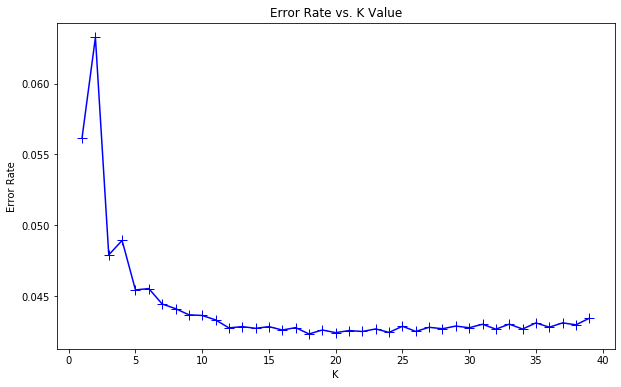

In [1112]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [1113]:
# So let us use k = 18.
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [1114]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 12390   3883   1496]
 [  2795 182512     10]
 [  1431      4  22761]]
              precision    recall  f1-score   support

           1       0.75      0.70      0.72     17769
           4       0.98      0.98      0.98    185317
           6       0.94      0.94      0.94     24196

    accuracy                           0.96    227282
   macro avg       0.89      0.87      0.88    227282
weighted avg       0.96      0.96      0.96    227282



### Logistic Regression

In [1115]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

/Users/yushuohan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [1116]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   801  15166   1802]
 [   182 180453   4682]
 [  1292  12084  10820]]
              precision    recall  f1-score   support

           1       0.35      0.05      0.08     17769
           4       0.87      0.97      0.92    185317
           6       0.63      0.45      0.52     24196

    accuracy                           0.85    227282
   macro avg       0.62      0.49      0.51    227282
weighted avg       0.80      0.85      0.81    227282



### Decision tree

In [1117]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [1118]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 12467   3997   1305]
 [  4126 181191      0]
 [  1336      0  22860]]
              precision    recall  f1-score   support

           1       0.70      0.70      0.70     17769
           4       0.98      0.98      0.98    185317
           6       0.95      0.94      0.95     24196

    accuracy                           0.95    227282
   macro avg       0.87      0.87      0.87    227282
weighted avg       0.95      0.95      0.95    227282



### Random Forest

In [1119]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1120]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 13127   3640   1002]
 [  2279 183038      0]
 [  1057      0  23139]]
              precision    recall  f1-score   support

           1       0.80      0.74      0.77     17769
           4       0.98      0.99      0.98    185317
           6       0.96      0.96      0.96     24196

    accuracy                           0.96    227282
   macro avg       0.91      0.89      0.90    227282
weighted avg       0.96      0.96      0.96    227282



In [1122]:
# We now gridsearch on the number of trees in the forest.
error_rate = []

for i in range(50,125):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    rfc_pred = rfc.predict(X_test)
    error_rate.append(np.mean(rfc_pred != y_test))
    print("Done: " + str(i))

Done: 50
Done: 51
Done: 52
Done: 53
Done: 54
Done: 55
Done: 56
Done: 57
Done: 58
Done: 59
Done: 60
Done: 61
Done: 62
Done: 63
Done: 64
Done: 65
Done: 66
Done: 67
Done: 68
Done: 69
Done: 70
Done: 71
Done: 72
Done: 73
Done: 74
Done: 75
Done: 76
Done: 77
Done: 78
Done: 79
Done: 80
Done: 81
Done: 82
Done: 83
Done: 84
Done: 85
Done: 86
Done: 87
Done: 88
Done: 89
Done: 90
Done: 91
Done: 92
Done: 93
Done: 94
Done: 95
Done: 96
Done: 97
Done: 98
Done: 99
Done: 100
Done: 101
Done: 102
Done: 103
Done: 104
Done: 105
Done: 106
Done: 107
Done: 108
Done: 109
Done: 110
Done: 111
Done: 112
Done: 113
Done: 114
Done: 115
Done: 116
Done: 117
Done: 118
Done: 119
Done: 120
Done: 121
Done: 122
Done: 123
Done: 124


Text(0, 0.5, 'Error Rate')

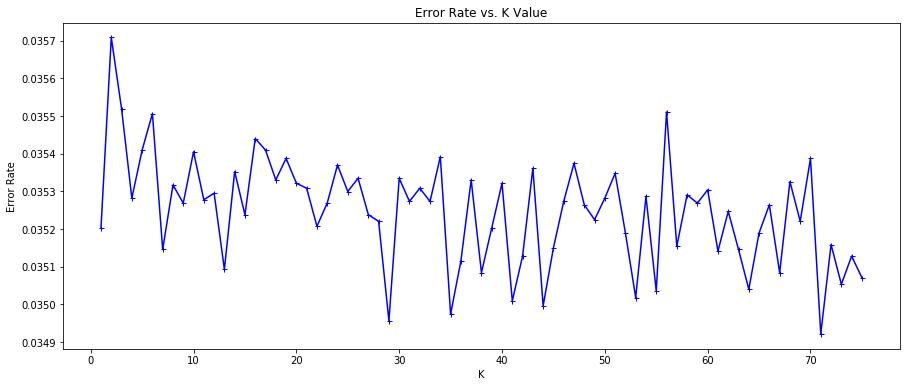

In [1123]:
plt.figure(figsize=(15,6))
plt.plot(range(1,76),error_rate,color='blue', marker='+',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [1]:
# optimal value occurs at 71.
rfc = RandomForestClassifier(n_estimators=122)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

NameError: name 'RandomForestClassifier' is not defined

### SVC

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

In [ ]:
# grid search
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_estimator_

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))